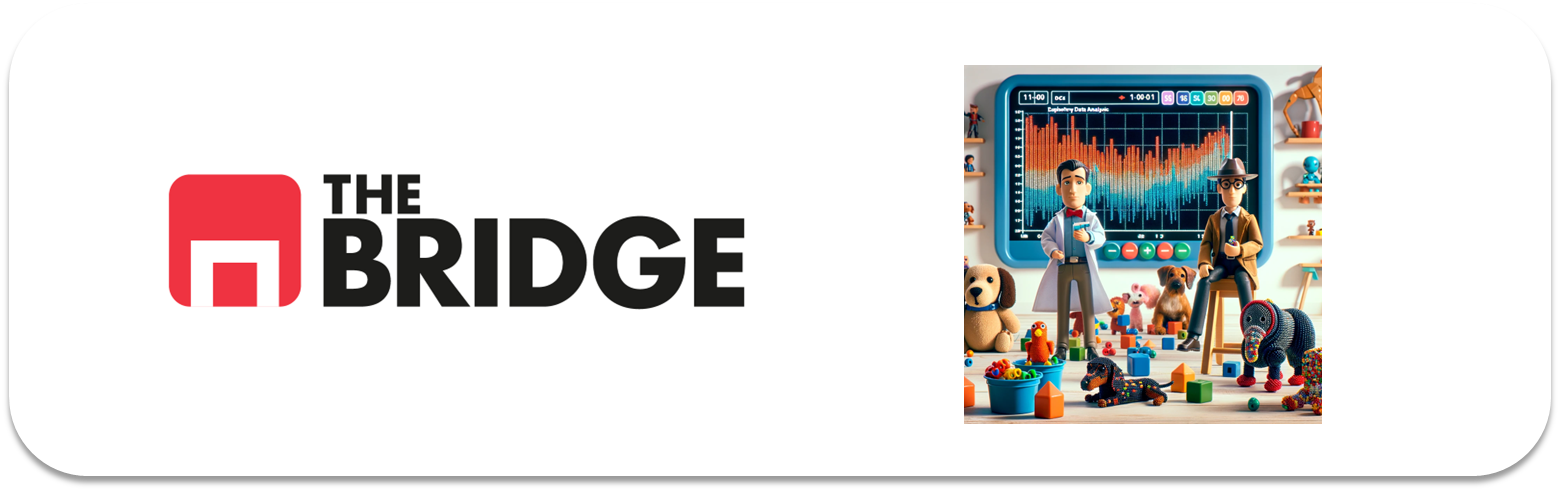

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [18]:
df_titanic = pd.read_csv('./data/titanic.csv')

### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [19]:
df_titanic = df_titanic.drop(columns=['deck', 'survived', 'pclass', 'embarked'])

### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [20]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']

df_titanic = df_titanic.drop(columns=['parch', 'sibsp'])

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [21]:
moda_embark_town = df_titanic['embark_town'].mode()[0]  
df_titanic['embark_town'].fillna(moda_embark_town, inplace=True)

C:\Users\hugof\AppData\Local\Temp\ipykernel_15644\3173109011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(moda_embark_town, inplace=True)


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [22]:
media_age = df_titanic['age'].mean()

df_titanic['age'].fillna(media_age, inplace=True)

C:\Users\hugof\AppData\Local\Temp\ipykernel_15644\2653815168.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(media_age, inplace=True)


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [23]:
print(df_titanic.columns)

Index(['sex', 'age', 'fare', 'class', 'who', 'adult_male', 'embark_town',
       'alive', 'alone', 'family_members'],
      dtype='object')


columna_para_el_group_by
female    214
kid        40
male       88
dtype: int64
columna_para_el_group_by
female    75.886525
kid       57.971014
male      16.296296
dtype: float64


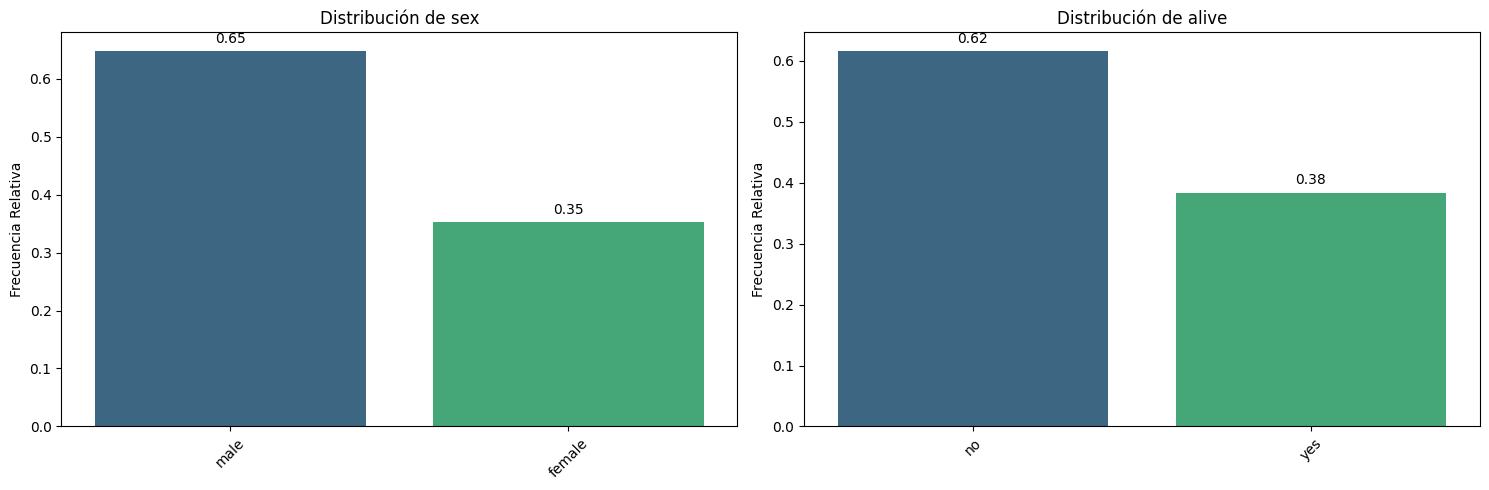

In [ ]:
# 1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

# En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en relativos?
# Sobrevivieron mas hombres

# hago columna para poder agrupar por niño hombre o mujer
df_titanic['columna_para_el_group_by'] = 'na'  
df_titanic.loc[df_titanic['age'] <= 12, 'columna_para_el_group_by'] = 'kid'  
df_titanic.loc[(df_titanic['sex'] == 'female') & (df_titanic['age'] > 12), 'columna_para_el_group_by'] = 'female' 
df_titanic.loc[(df_titanic['sex'] == 'male') & (df_titanic['age'] > 12), 'columna_para_el_group_by'] = 'male' 

total_absolutos = df_titanic[df_titanic['alive'] == 'yes'].groupby('columna_para_el_group_by').size()

total_de_cada_grupo = df_titanic.groupby('columna_para_el_group_by').size()

terminos_relativos = (total_absolutos / total_de_cada_grupo) * 100

print(total_absolutos)
print(terminos_relativos)

# ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?
# preguntar por crosstab, que es lo de chi-cuadrado




In [ ]:
# 2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

# En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos?
# sobrevivieron mas de primera
total_absolutos = df_titanic[df_titanic['alive'] == 'yes'].groupby('class').size()

total_de_cada_grupo = df_titanic.groupby('class').size()

terminos_relativos = (total_absolutos / total_de_cada_grupo) * 100

print(total_absolutos)
print(terminos_relativos)


class
First     136
Second     87
Third     119
dtype: int64
class
First     62.962963
Second    47.282609
Third     24.236253
dtype: float64


In [38]:
# 3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
total_absolutos = df_titanic[df_titanic['alive'] == 'yes'].groupby('embark_town').size()

total_de_cada_grupo = df_titanic.groupby('embark_town').size()

terminos_relativos = (total_absolutos / total_de_cada_grupo) * 100

print(total_absolutos)
print(terminos_relativos)


embark_town
Cherbourg       93
Queenstown      30
Southampton    219
dtype: int64
embark_town
Cherbourg      55.357143
Queenstown     38.961039
Southampton    33.900929
dtype: float64


In [27]:
# 4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?



In [41]:
# 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?
millonetis = df_titanic.loc[df_titanic['fare'].idxmax()]
print(millonetis[['fare', 'alive']])


fare     512.3292
alive         yes
Name: 258, dtype: object


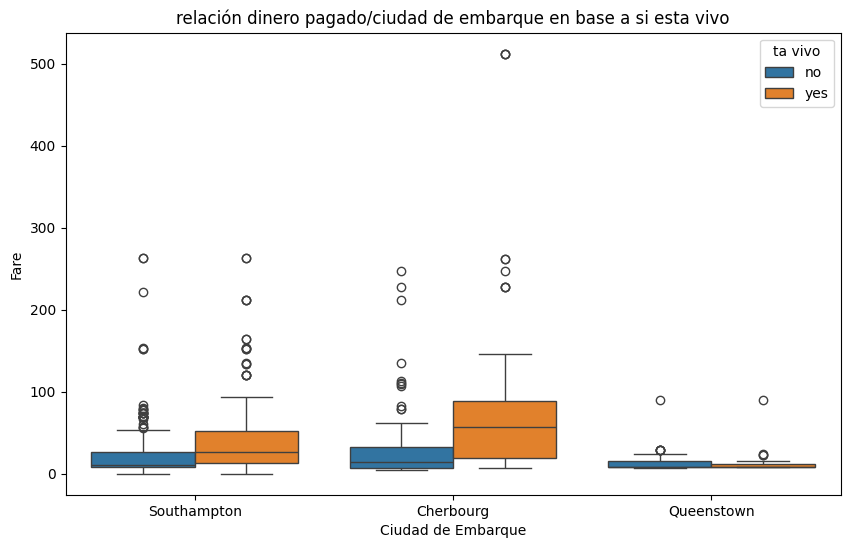

In [ ]:
# 6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.
# creo que es esto pero no lo tengo claro

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_titanic, x='embark_town', y='fare', hue='alive')
plt.title('relación dinero pagado/ciudad de embarque en base a si esta vivo')
plt.xlabel('ciudad de embarque')
plt.ylabel('Fare')
plt.legend(title='ta vivo')
plt.show()

In [49]:
# 7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
total_absolutos_clase = df_titanic[df_titanic['alive'] == 'yes'].groupby('class').size()

total_de_cada_grupo_clase = df_titanic.groupby('class').size()

terminos_relativos_clase = (total_absolutos_clase / total_de_cada_grupo_clase) * 100

print(f'cuantos sobrevivieron por clase absoluto: \n{total_absolutos_clase}')
print(f'cuantos sobrevivieron por clase relativo: \n{terminos_relativos_clase}')

total_absolutos_edad = df_titanic[df_titanic['alive'] == 'yes'].groupby('age').size()

total_de_cada_grupo_edad = df_titanic.groupby('age').size()

terminos_relativos_edad = (total_absolutos_edad / total_de_cada_grupo_edad) * 100

print(f'cuantos sobrevivieron por edad absoluto: \n{total_absolutos_edad}')
print(f'cuantos sobrevivieron por edad relativo: \n{terminos_relativos_edad}')


cuantos sobrevivieron por clase absoluto: 
class
First     136
Second     87
Third     119
dtype: int64
cuantos sobrevivieron por clase relativo: 
class
First     62.962963
Second    47.282609
Third     24.236253
dtype: float64
cuantos sobrevivieron por edad absoluto: 
age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
58.00    3
60.00    2
62.00    2
63.00    2
80.00    1
Length: 66, dtype: int64
cuantos sobrevivieron por edad relativo: 
age
0.42     100.0
0.67     100.0
0.75     100.0
0.83     100.0
0.92     100.0
         ...  
70.00      NaN
70.50      NaN
71.00      NaN
74.00      NaN
80.00    100.0
Length: 89, dtype: float64


In [ ]:
# 8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

Index(['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala',
       'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes'],
      dtype='object')


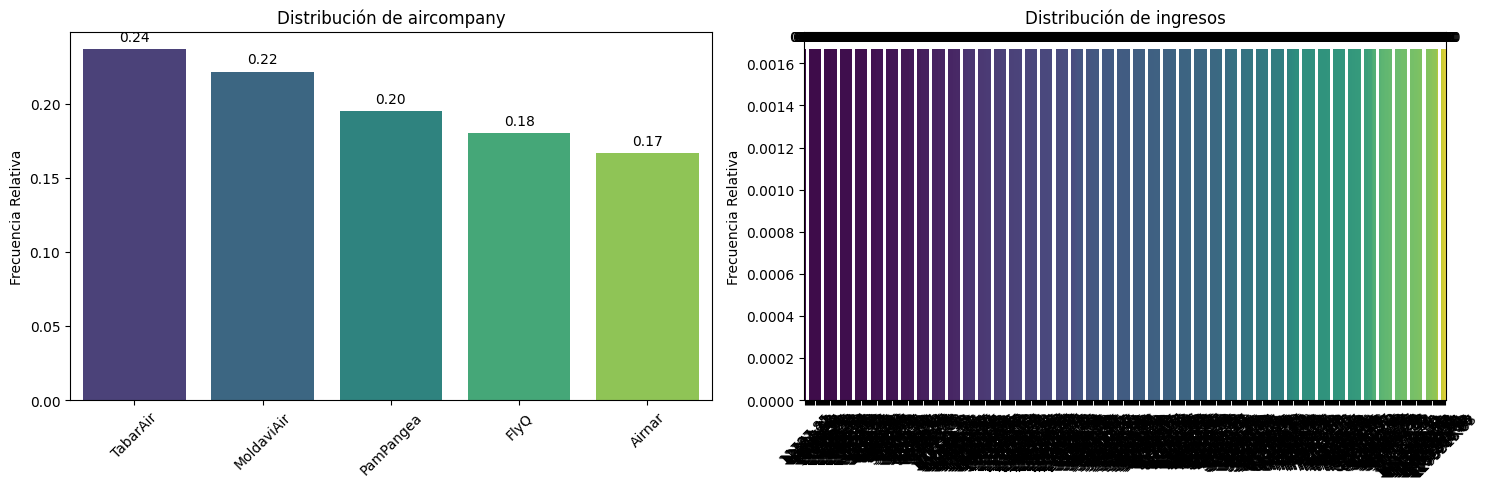

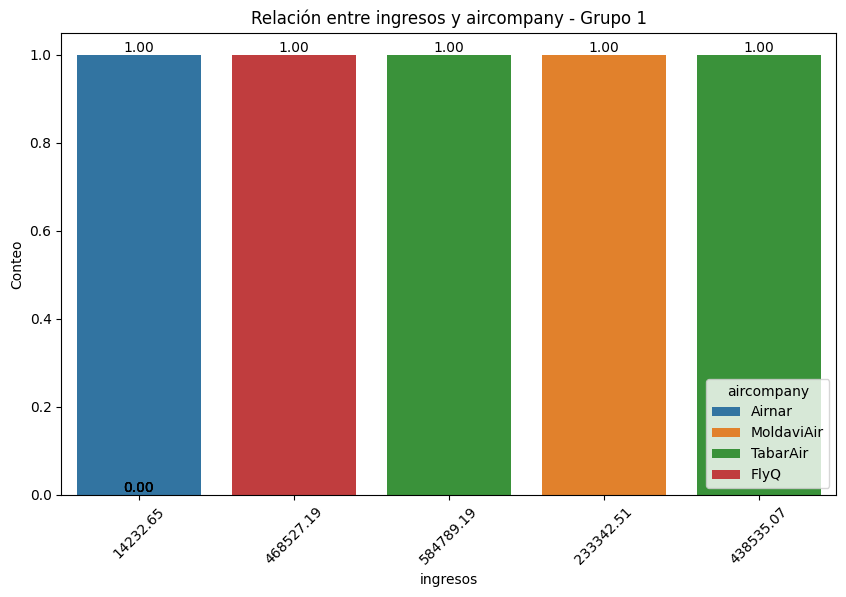

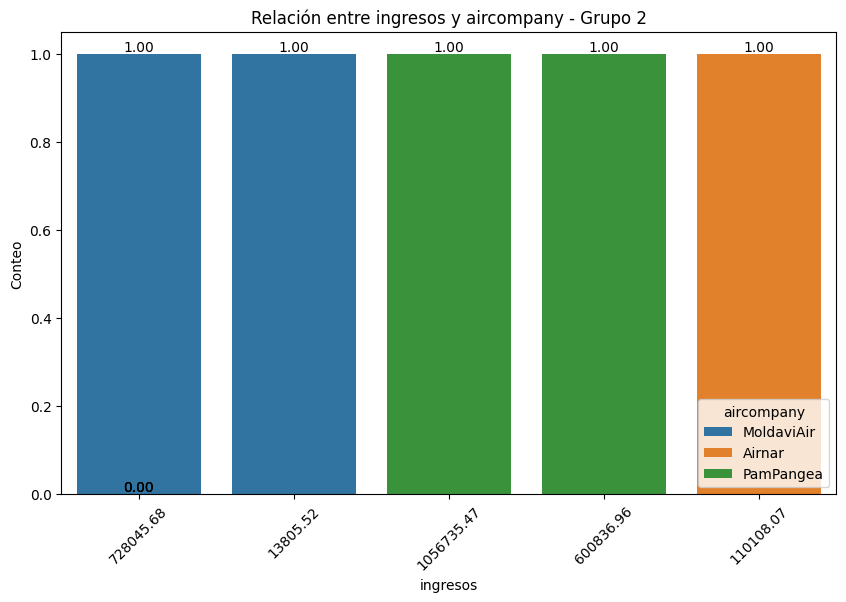

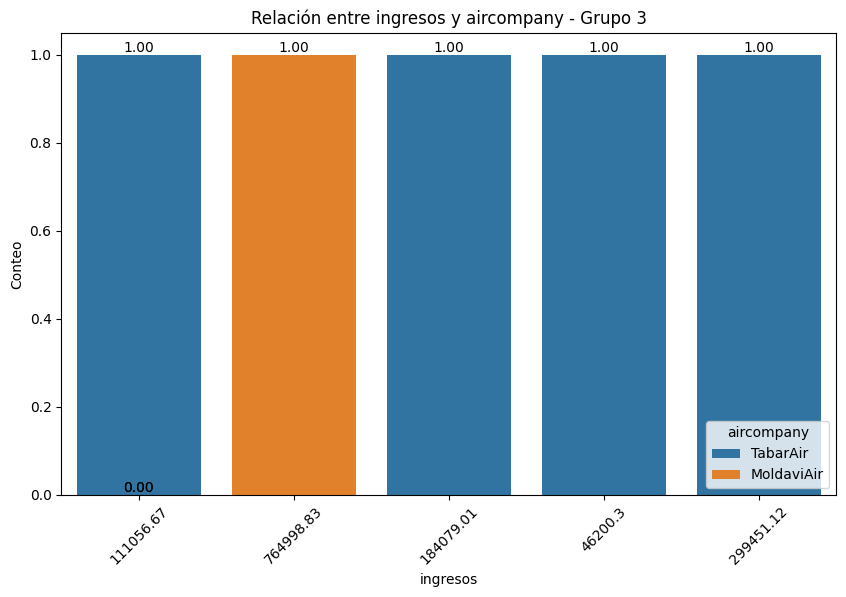

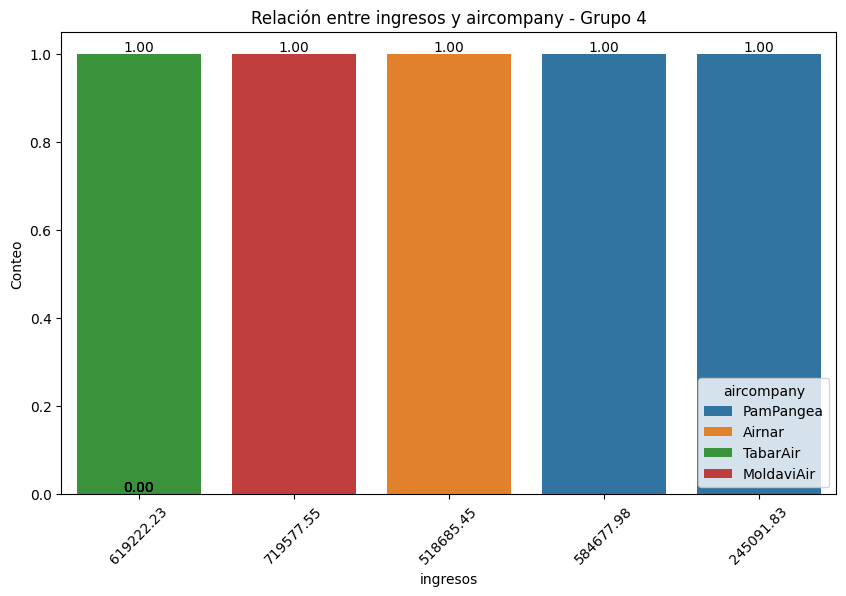

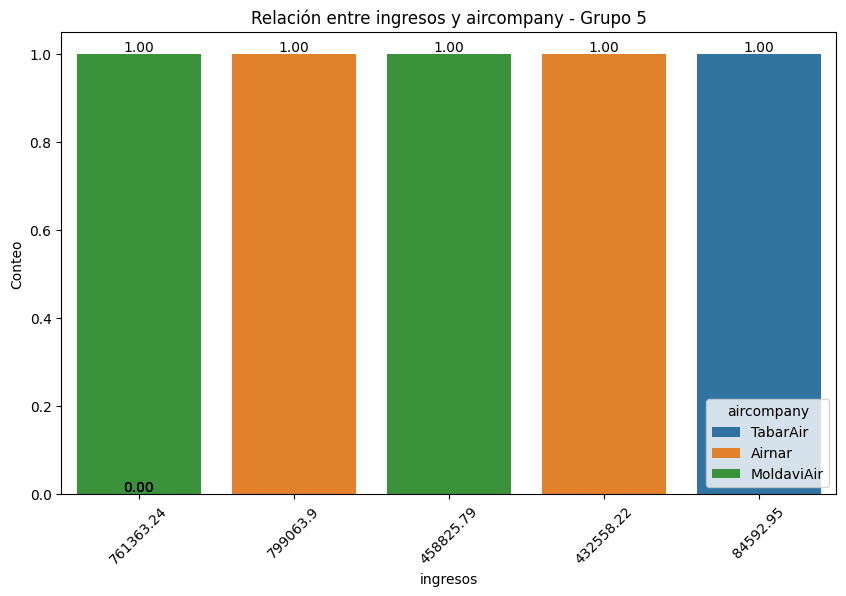

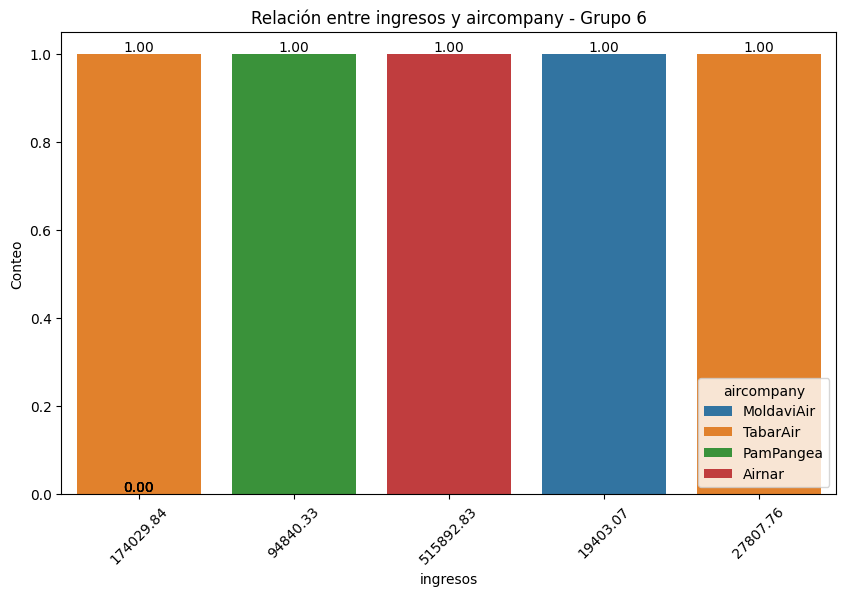

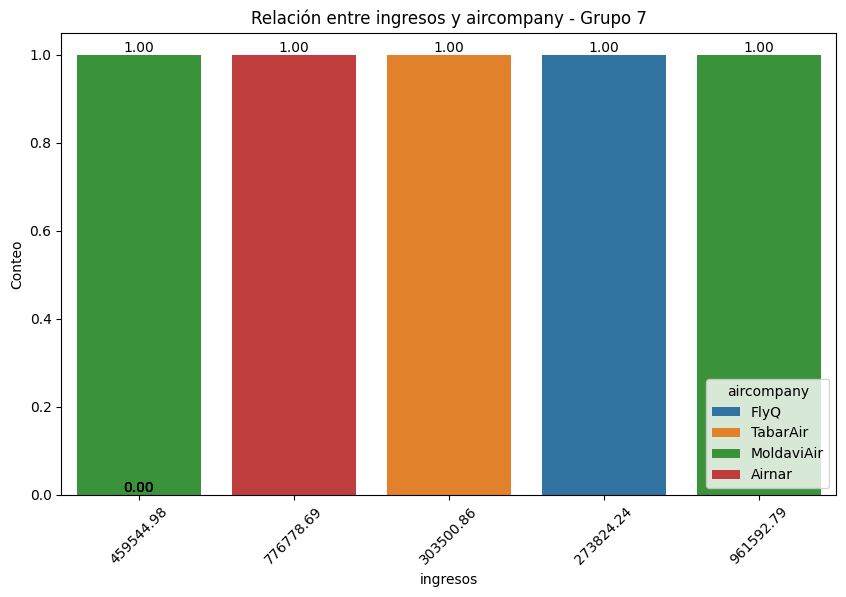

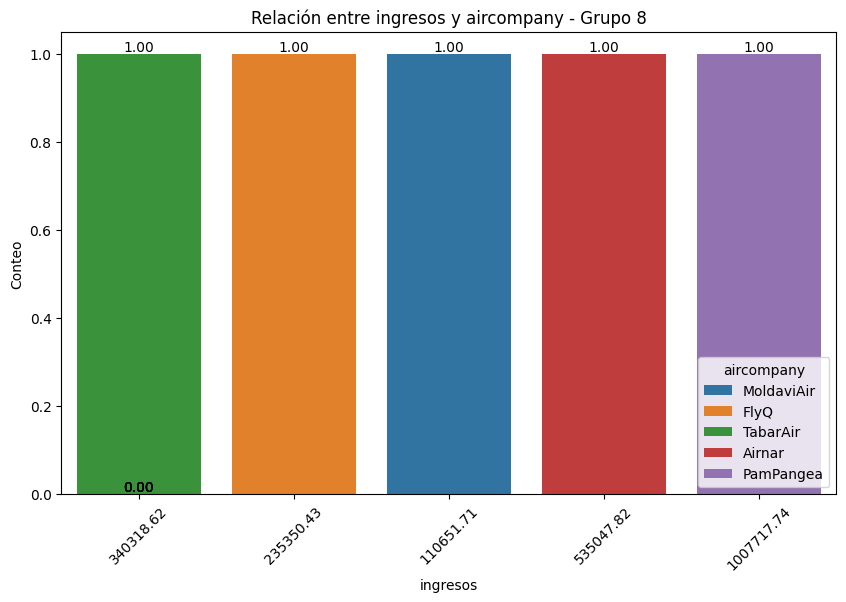

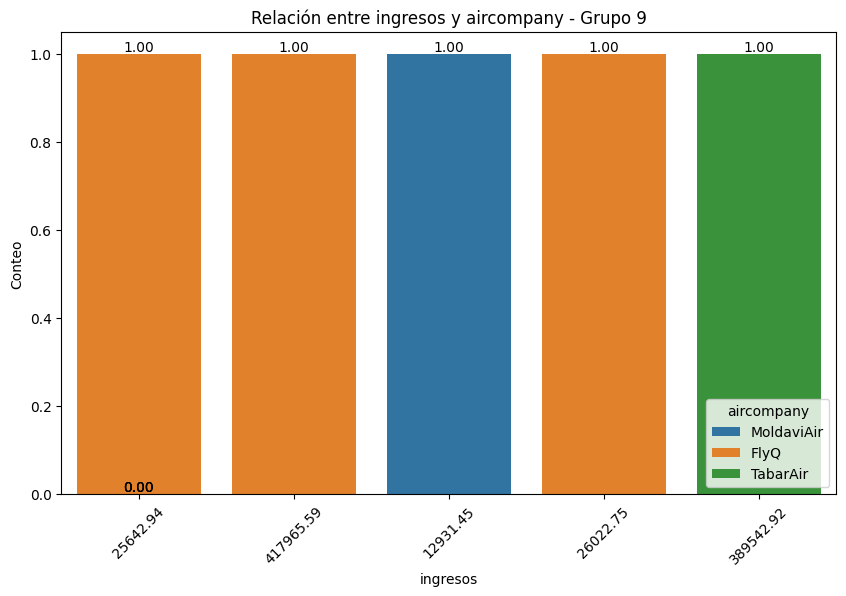

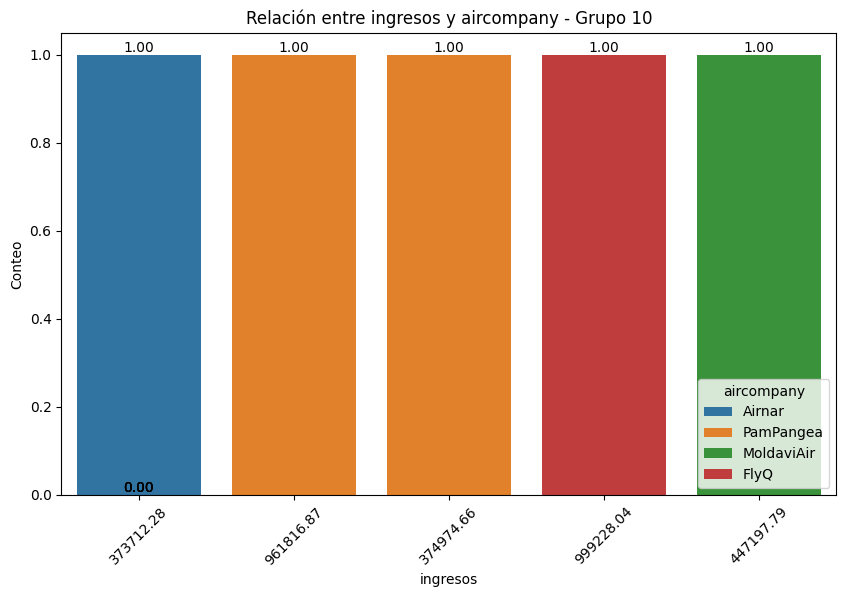

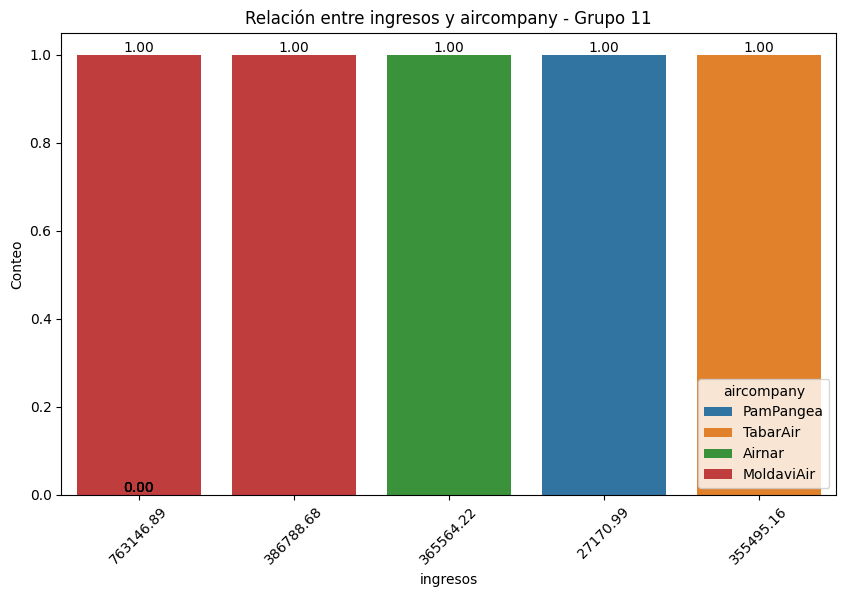

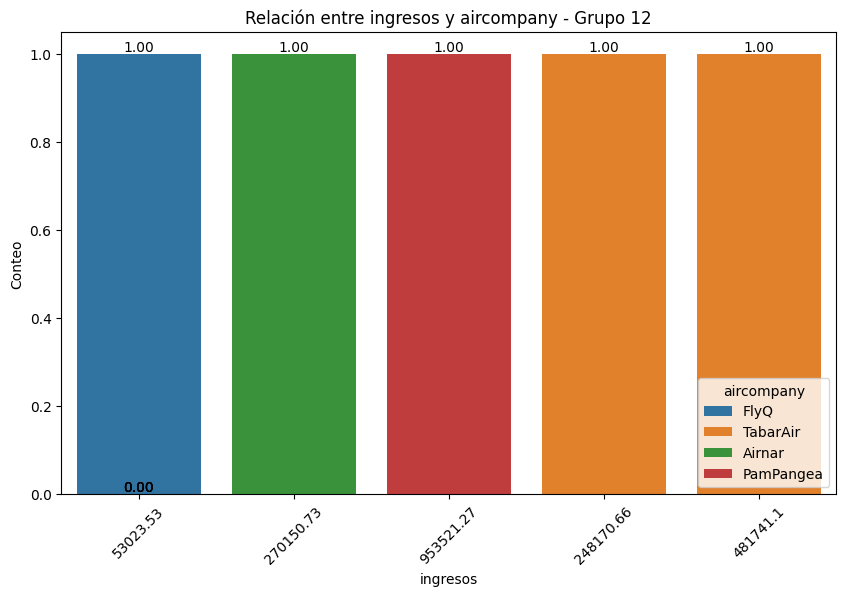

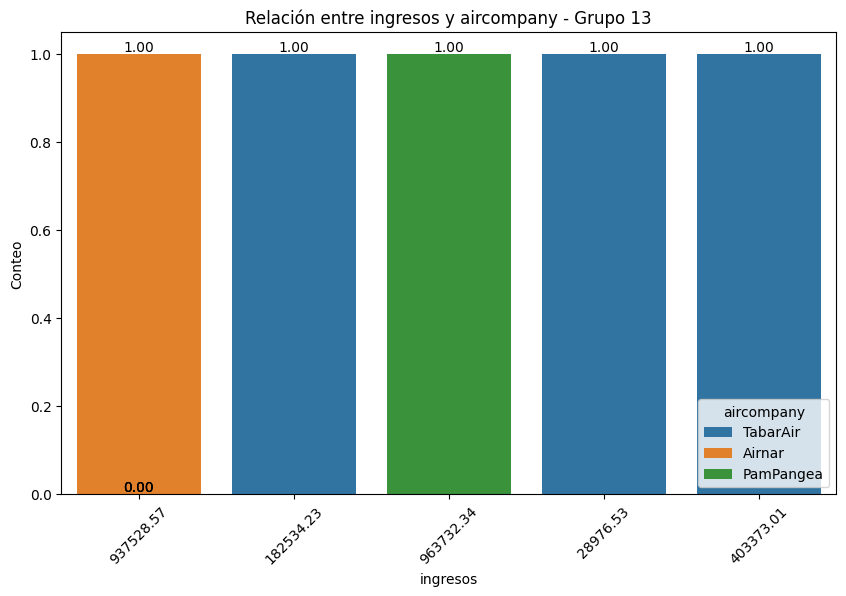

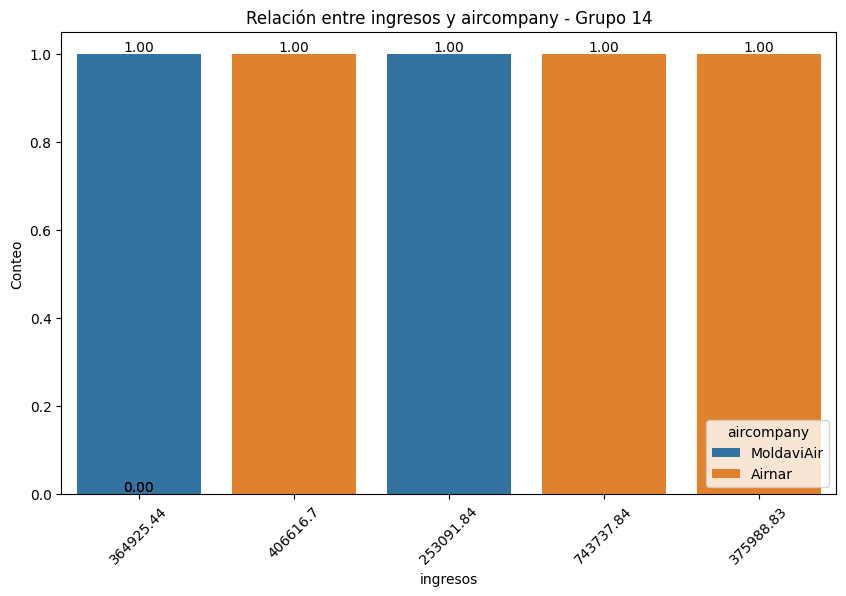

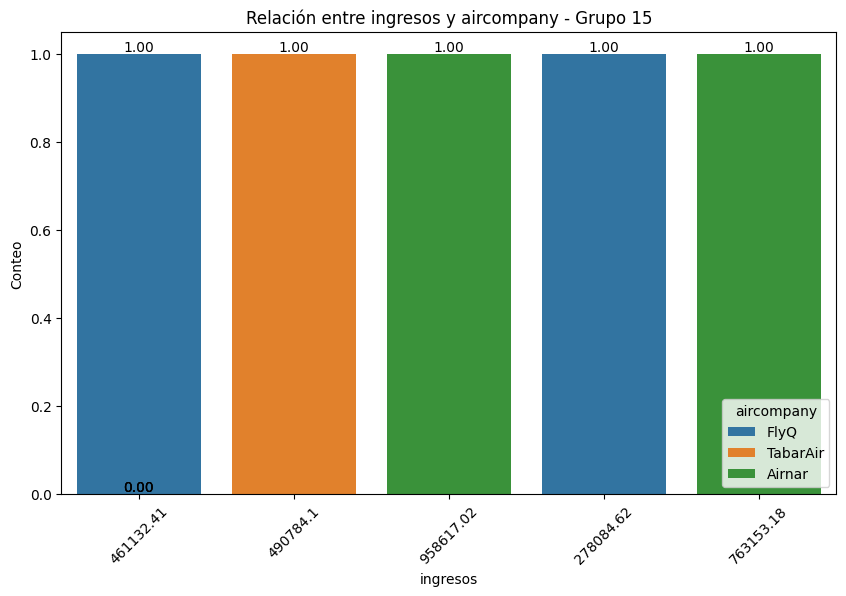

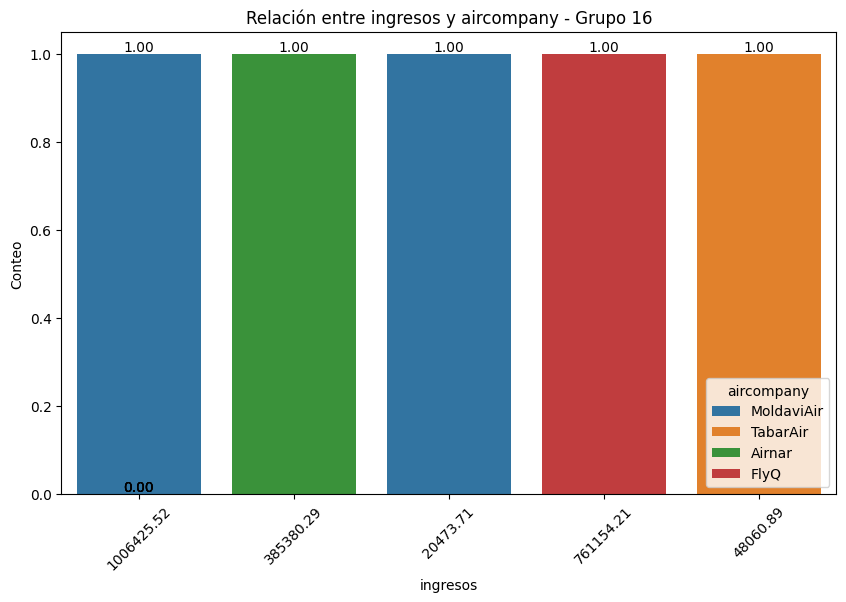

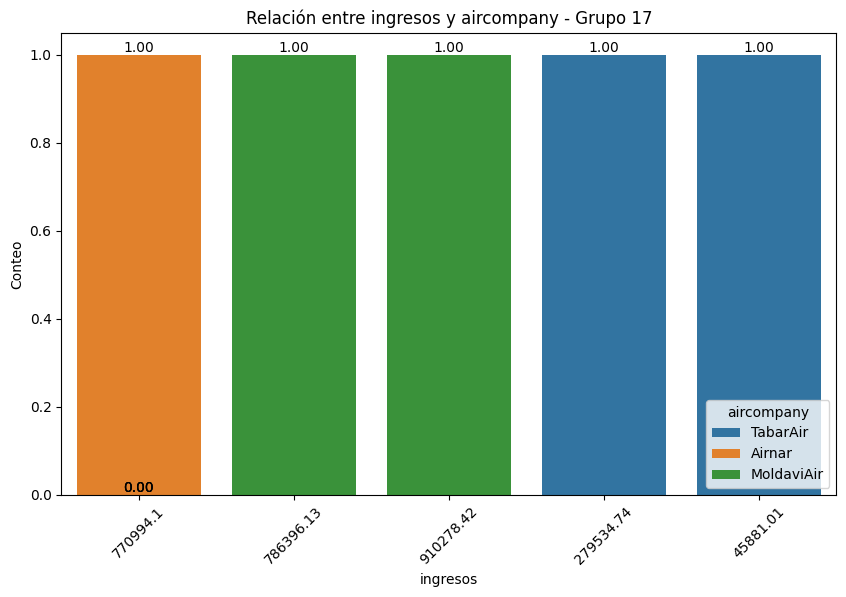

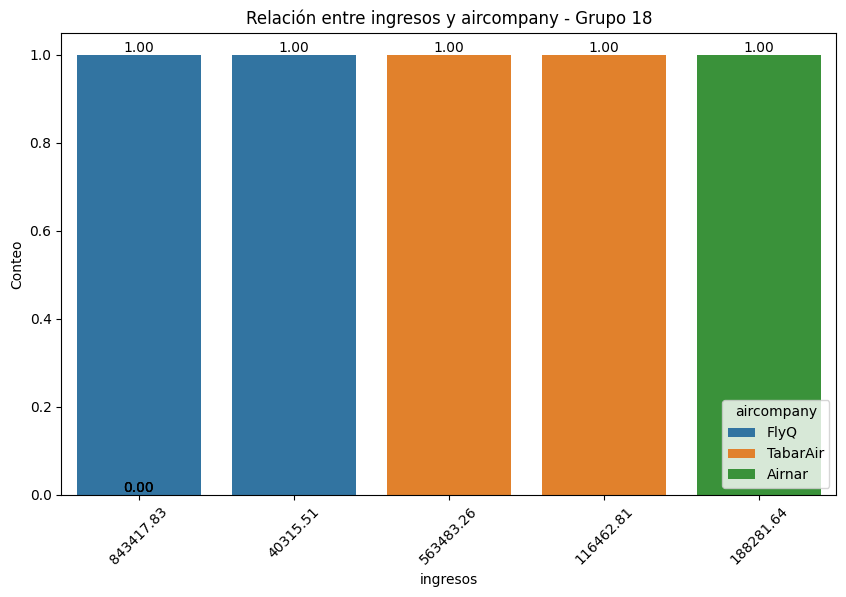

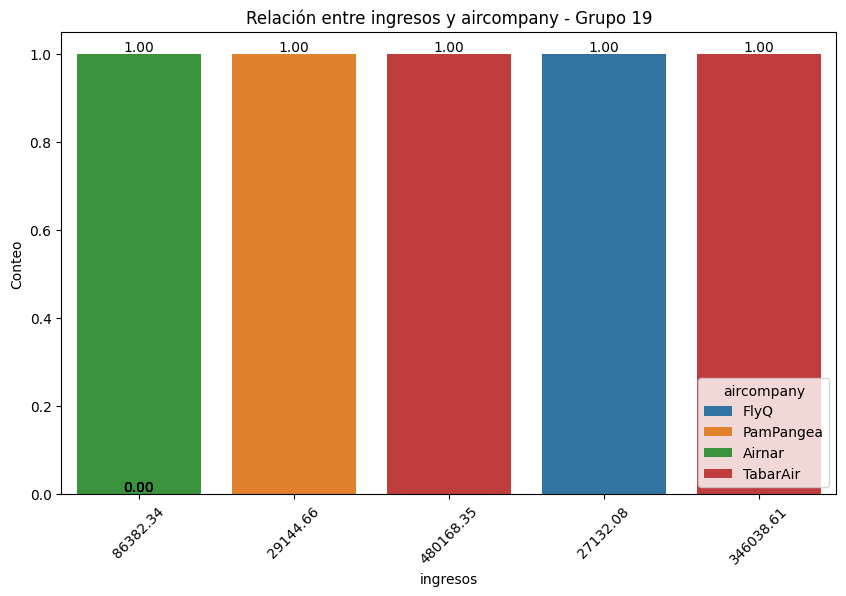

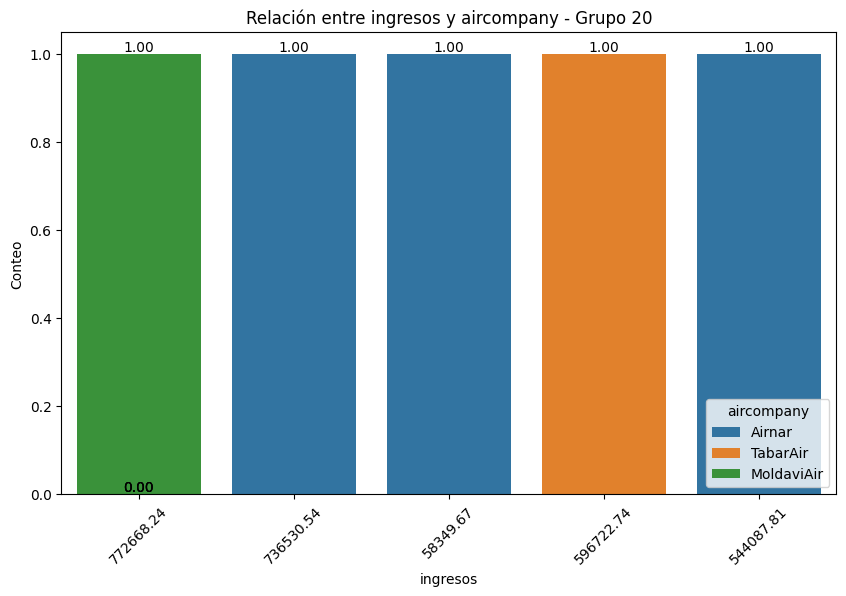

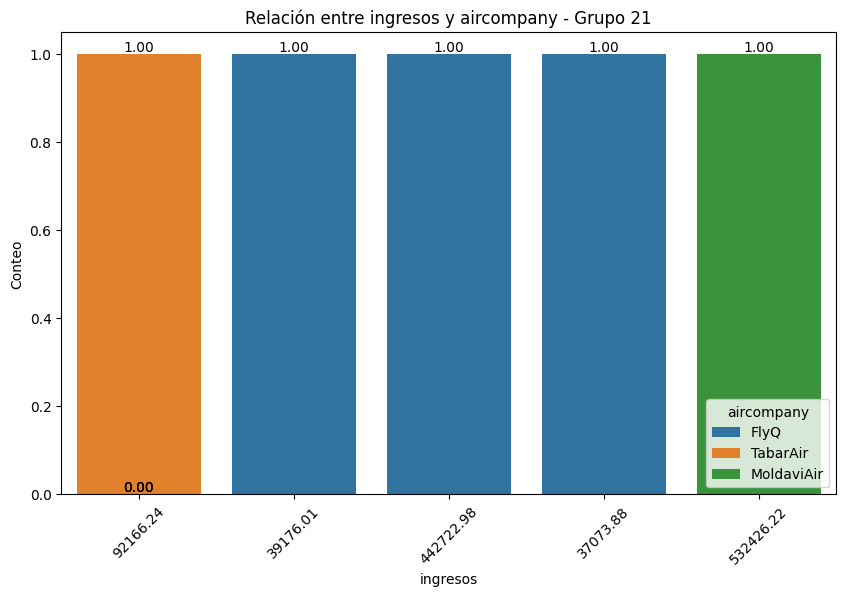

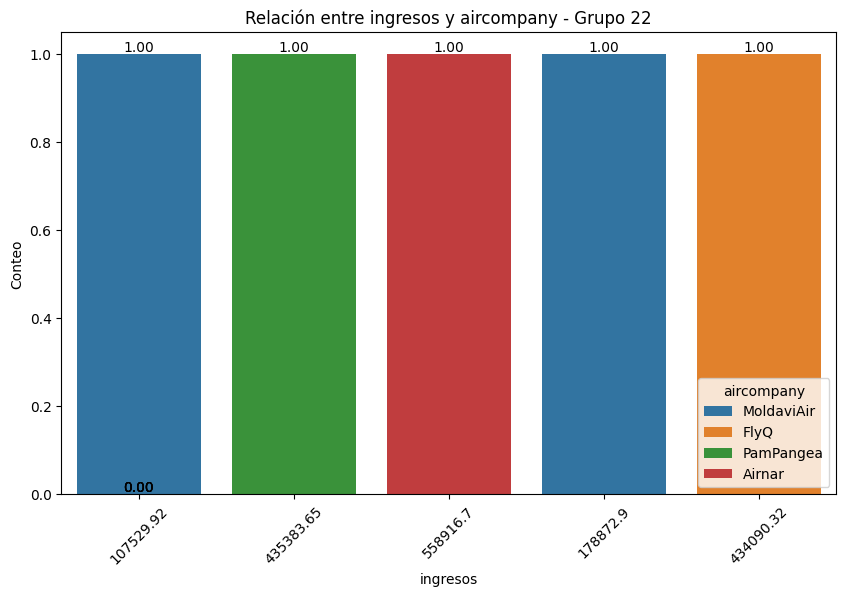

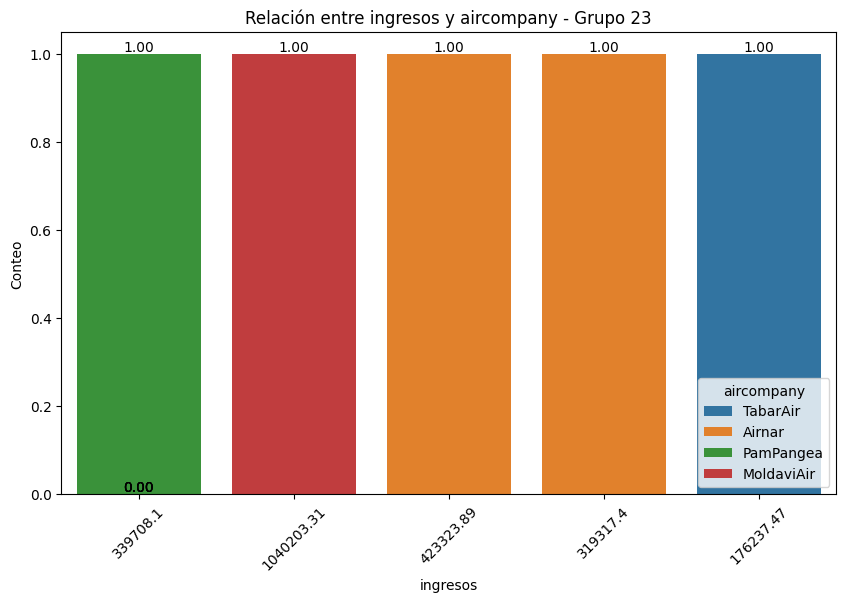

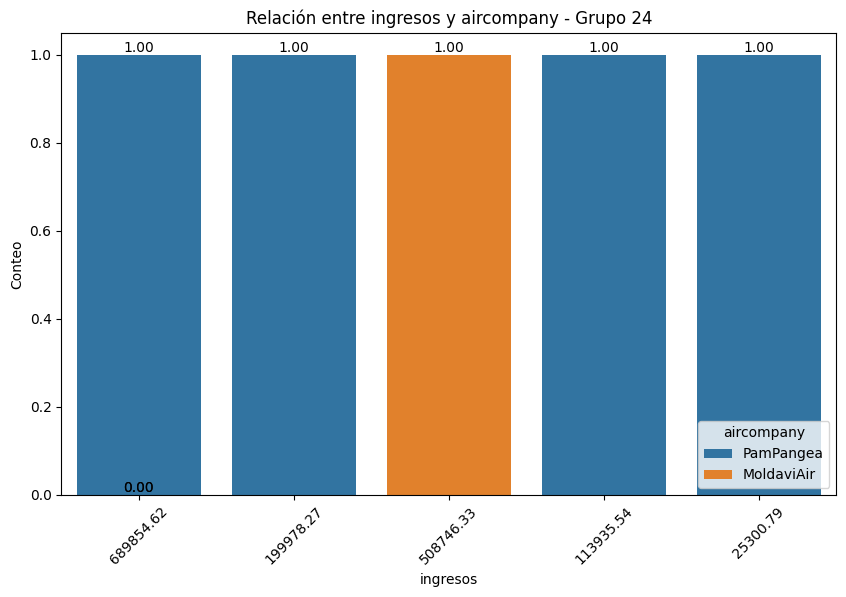

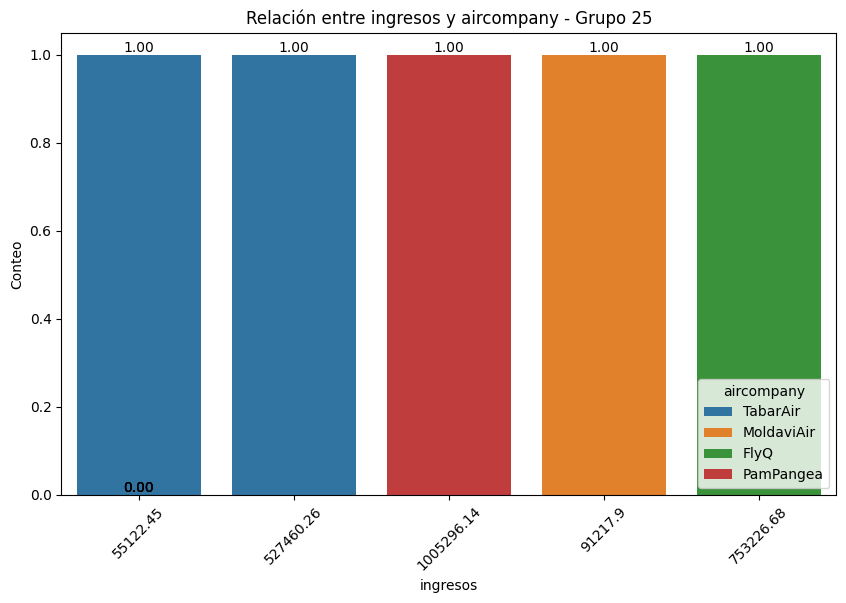

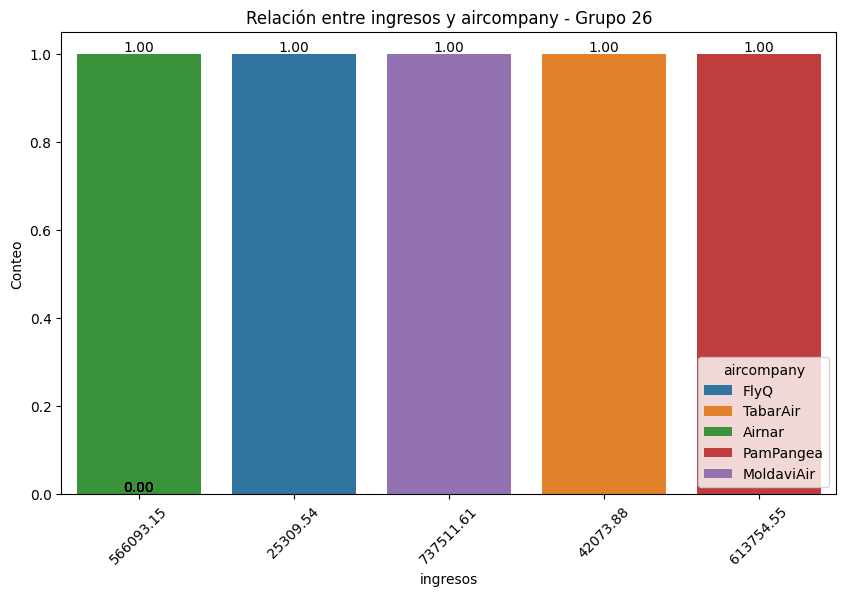

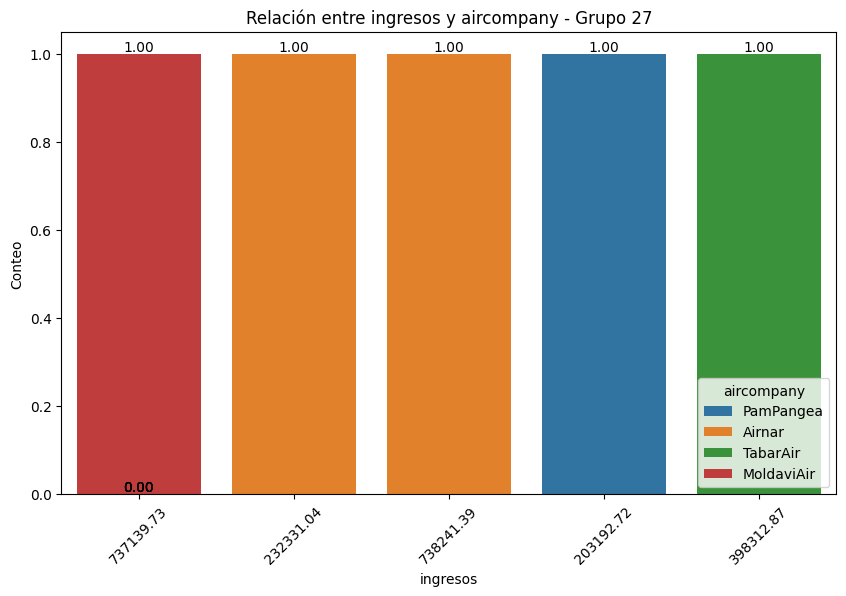

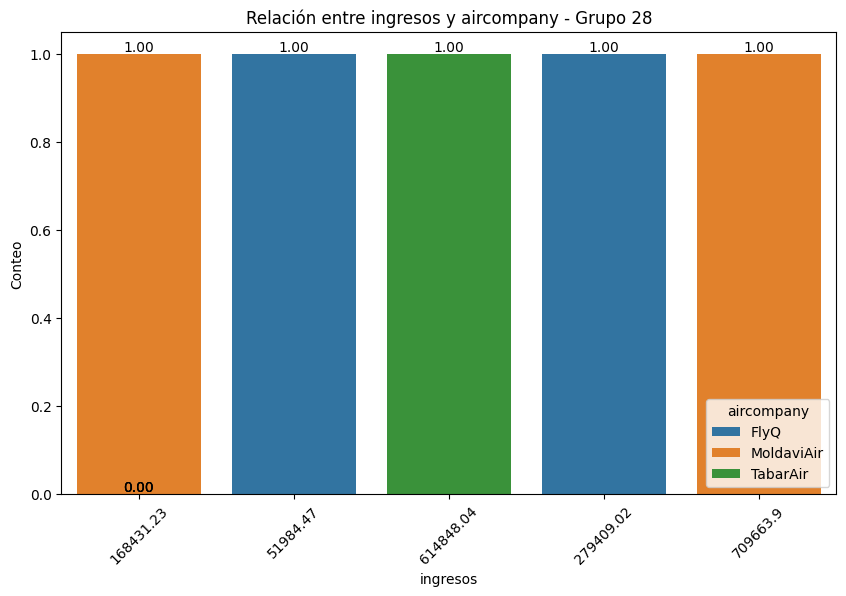

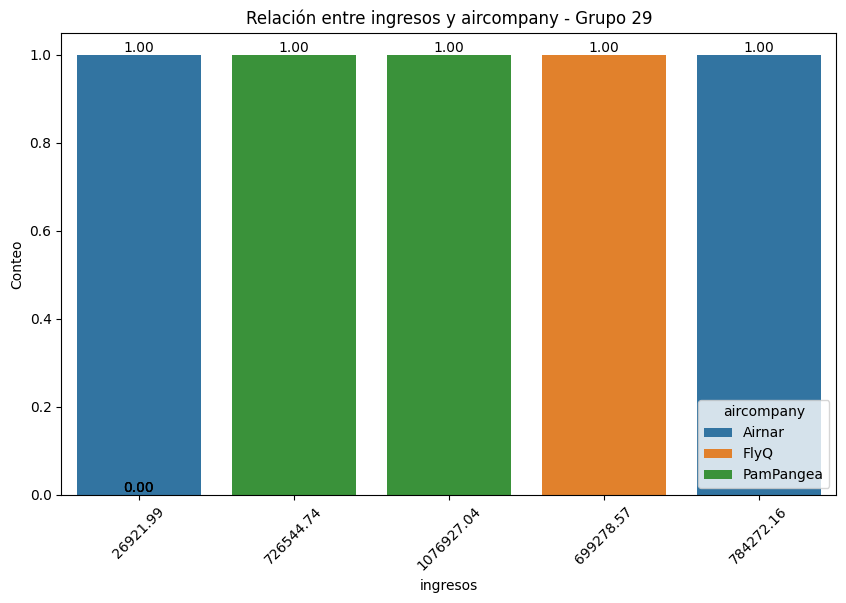

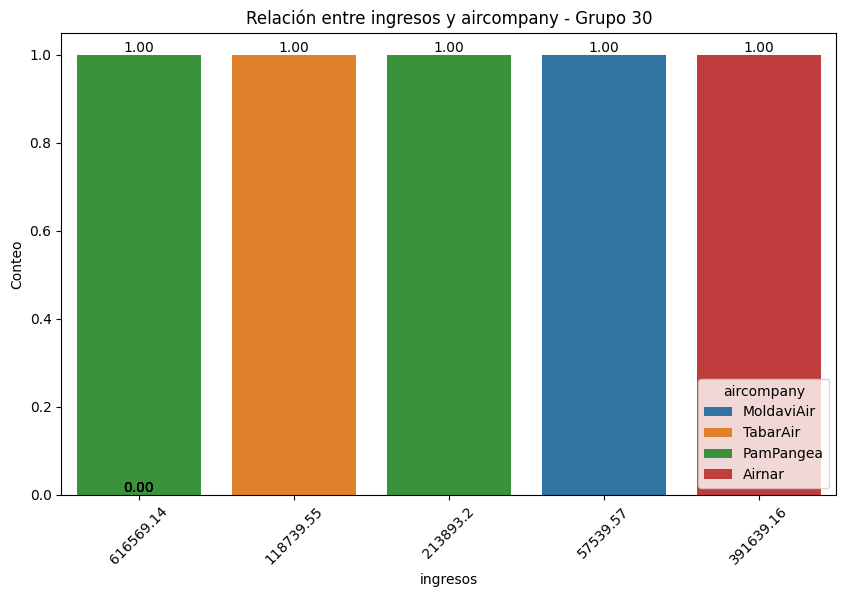

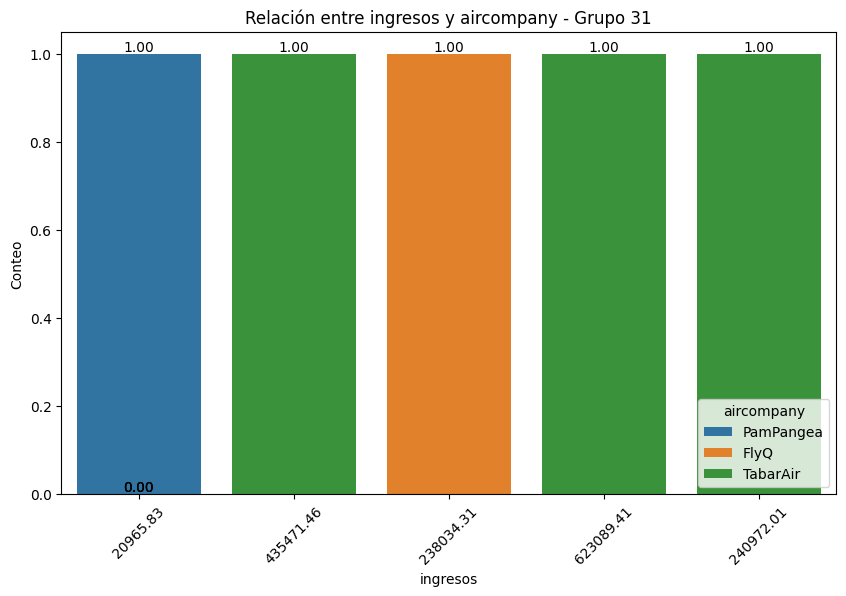

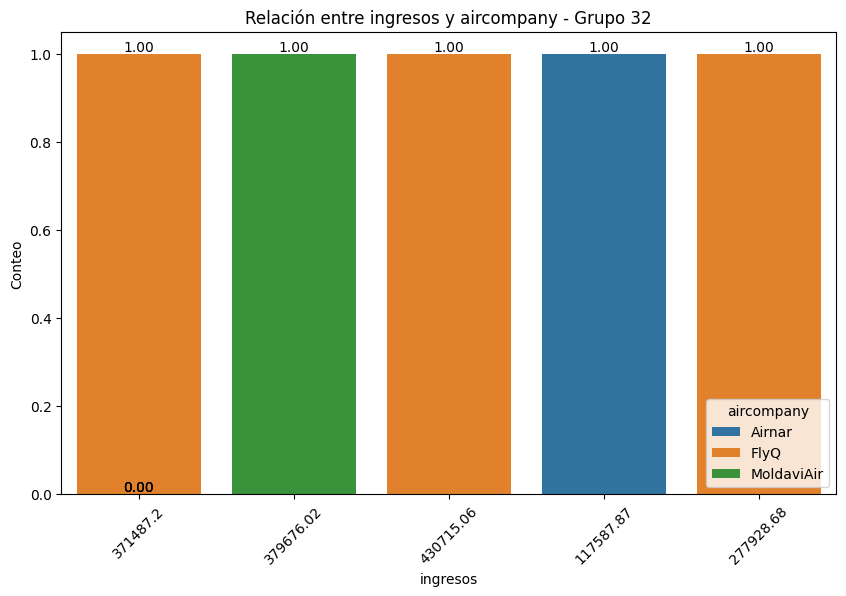

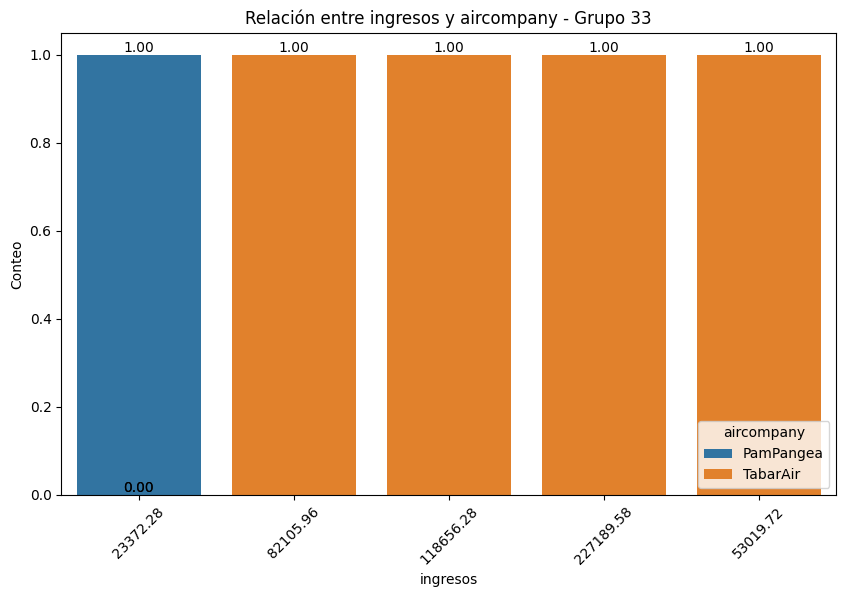

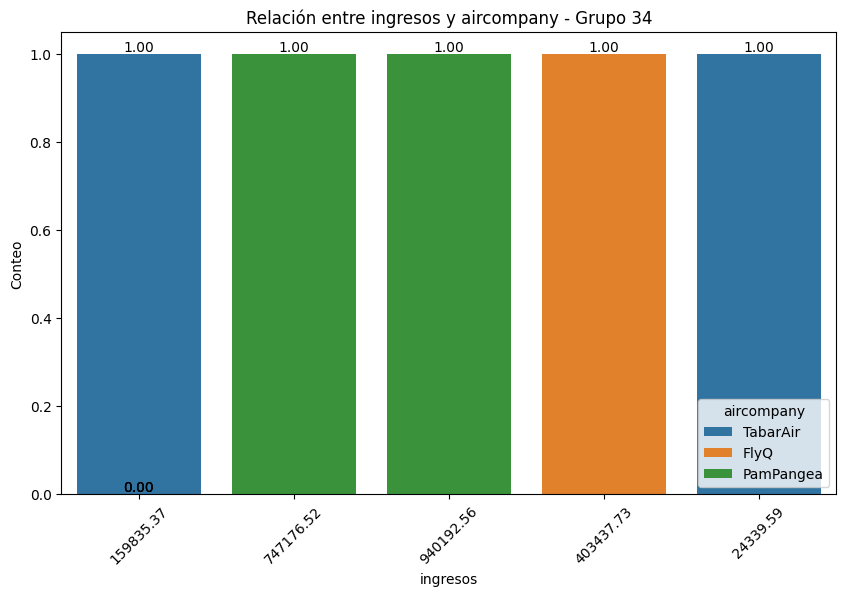

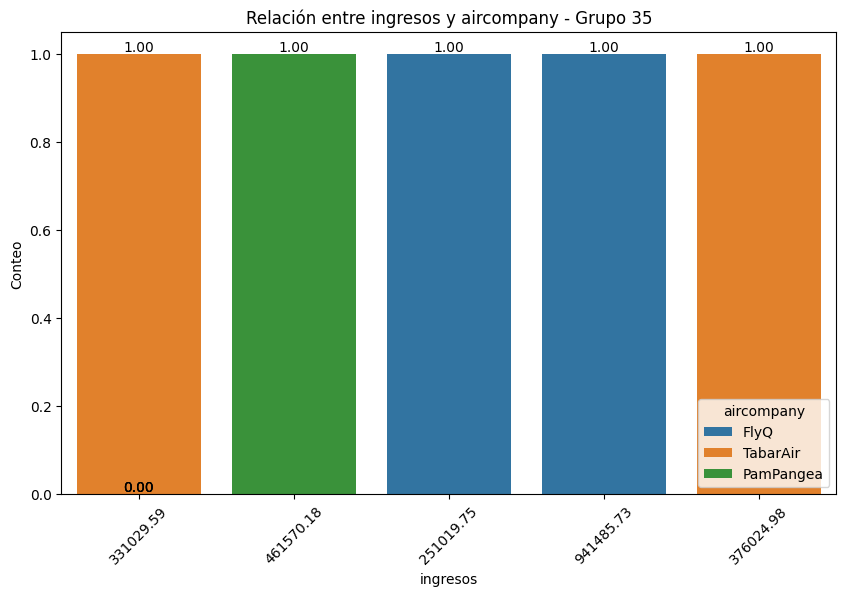

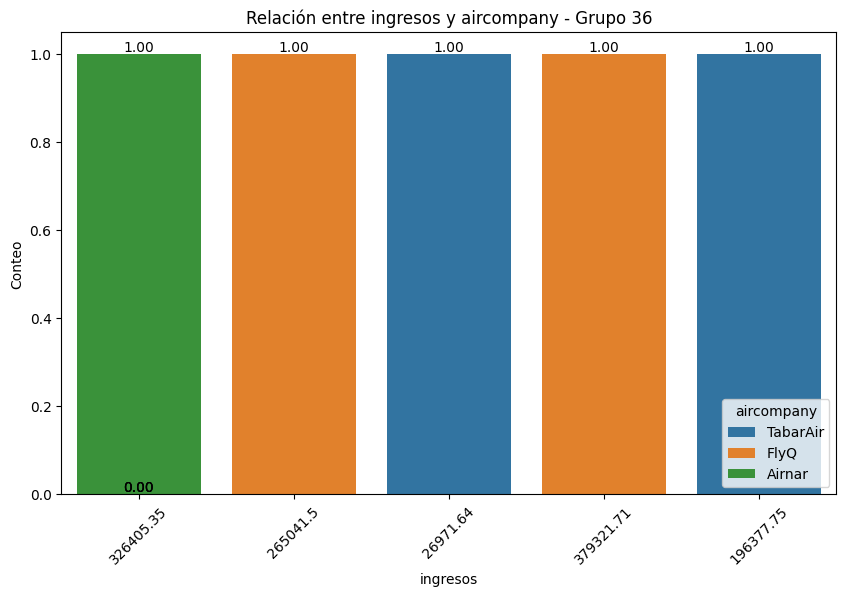

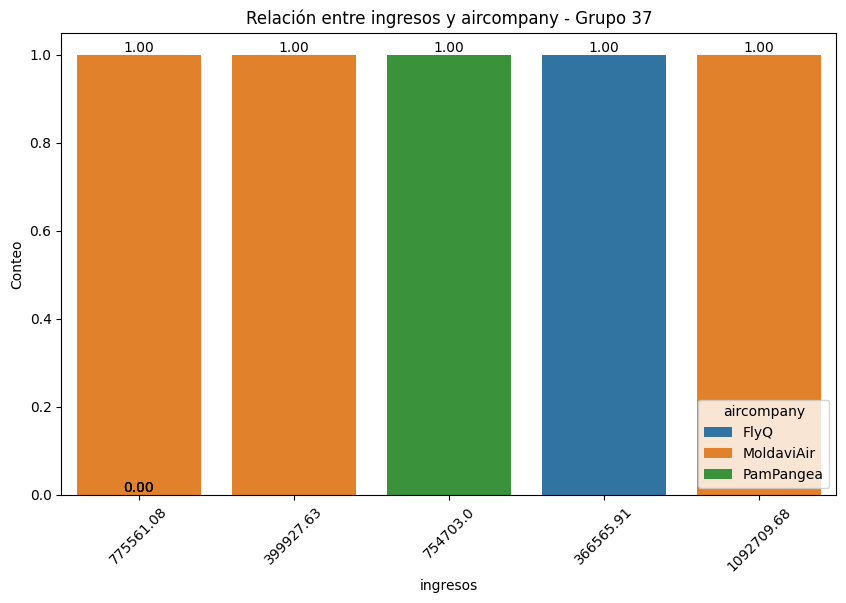

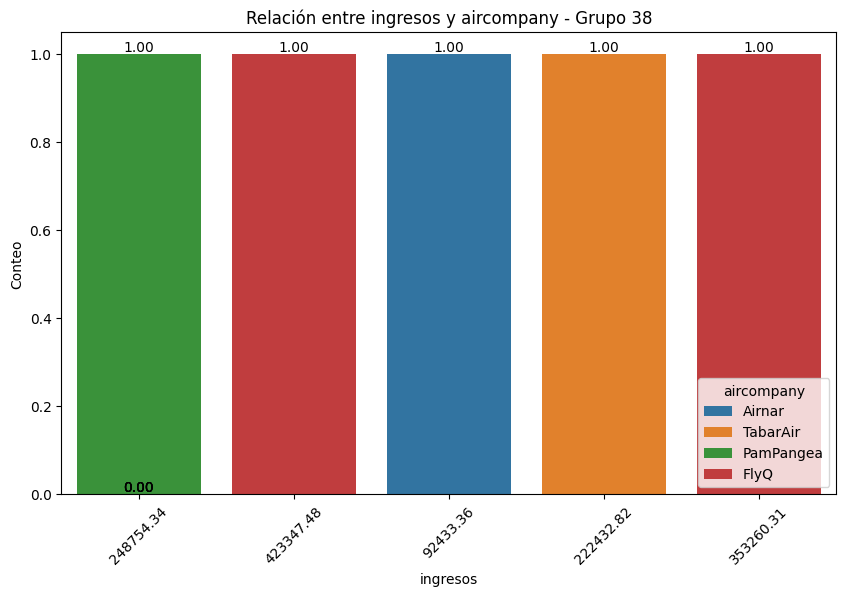

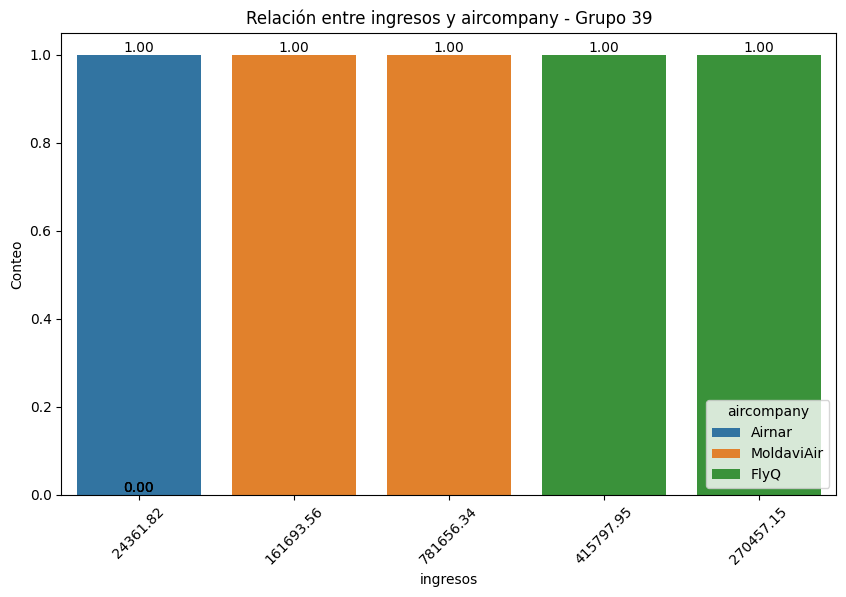

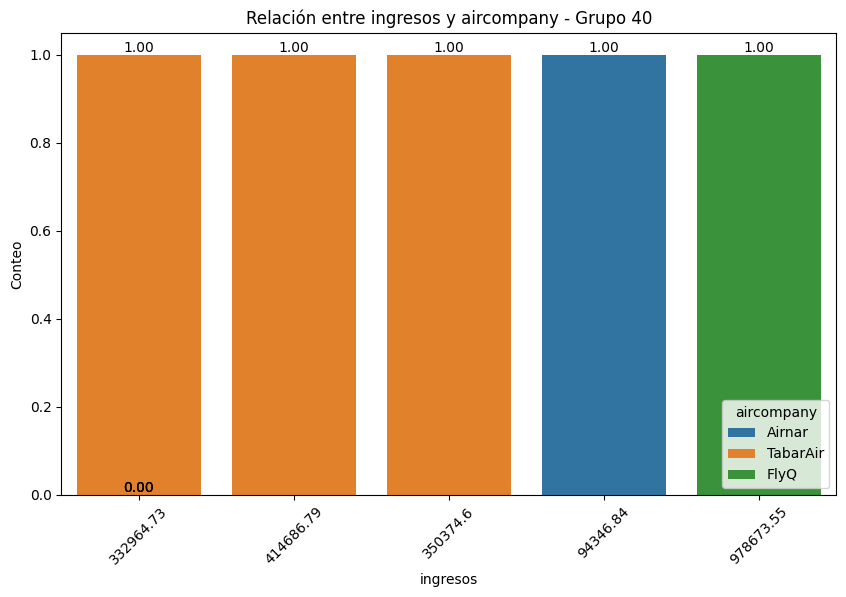

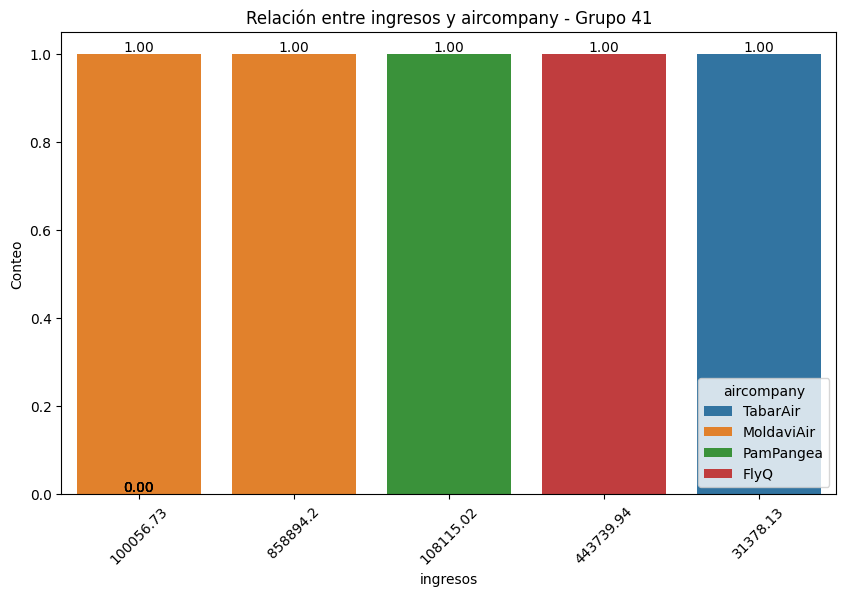

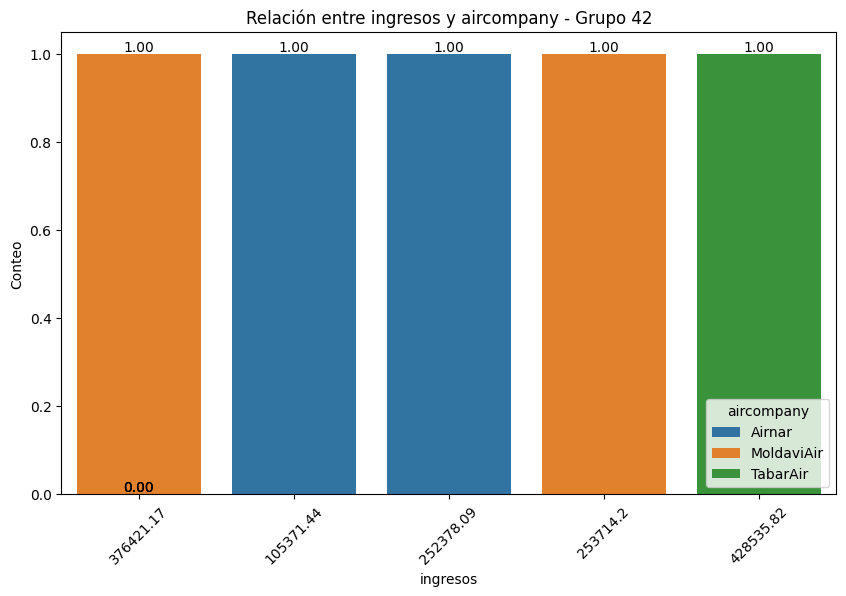

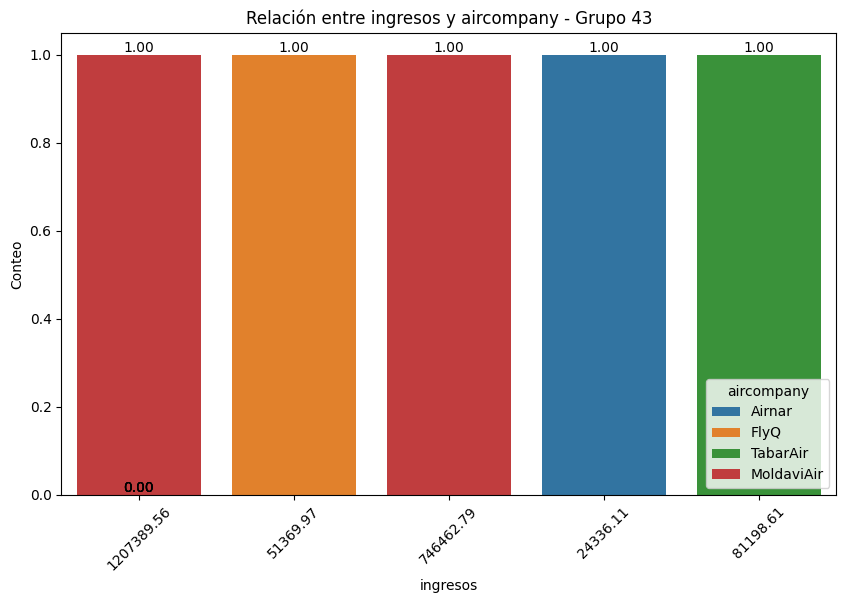

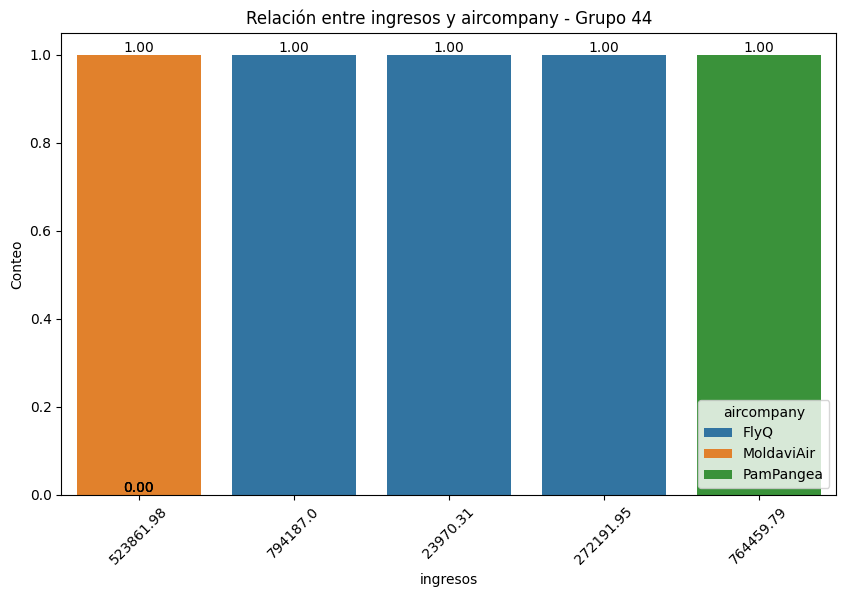

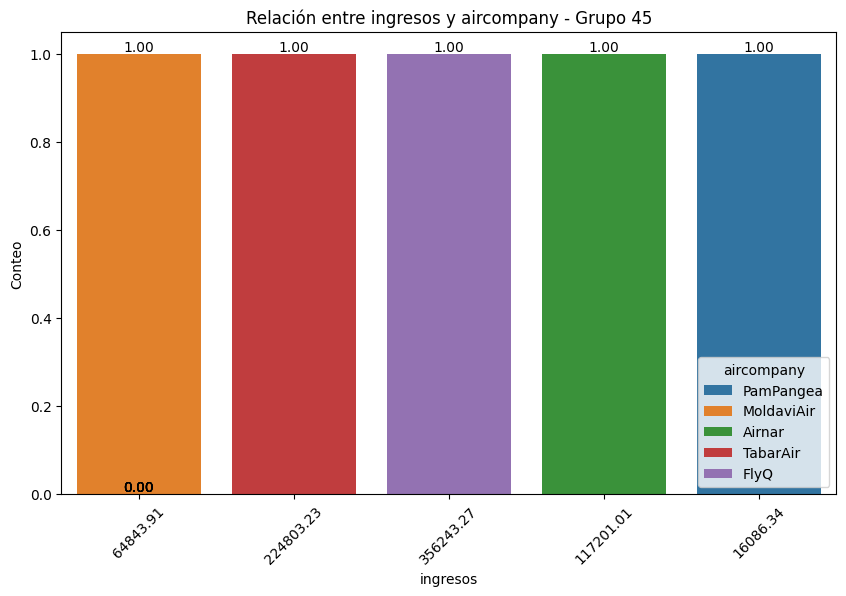

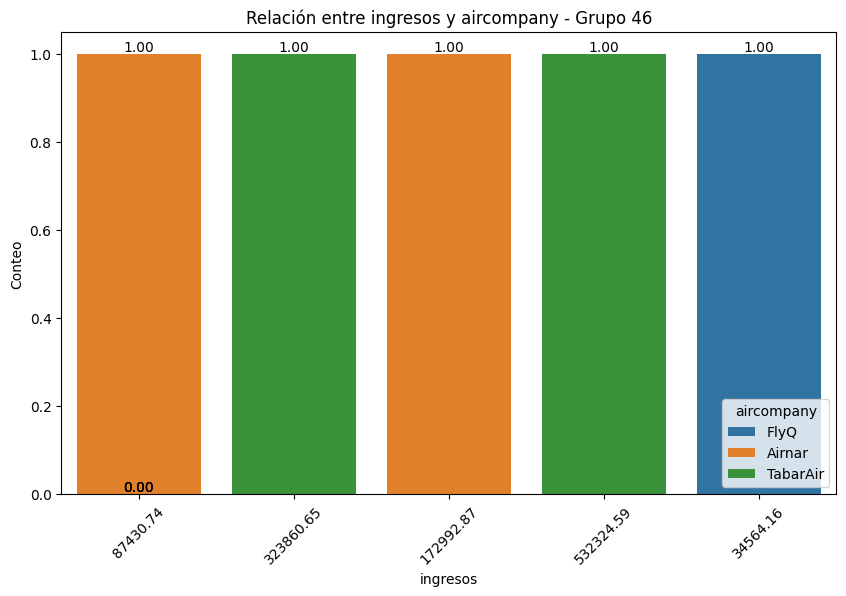

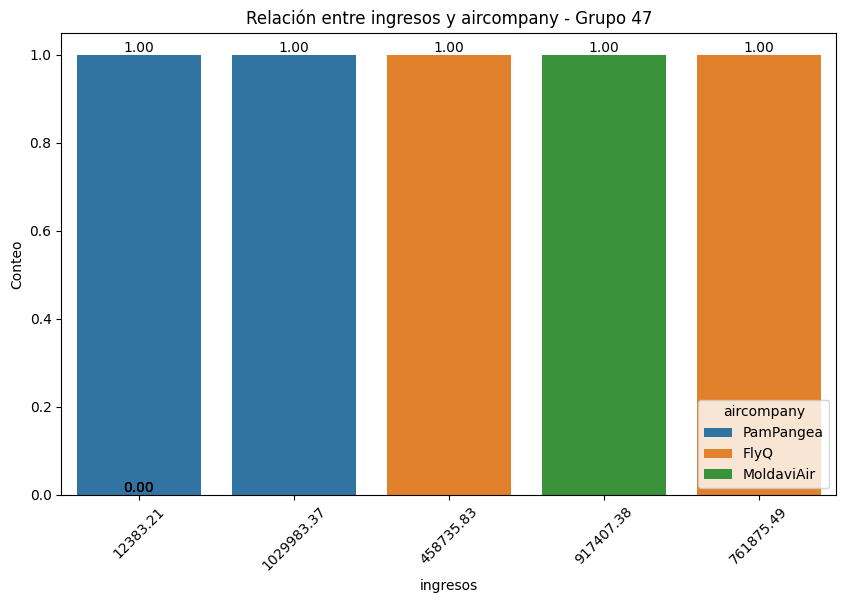

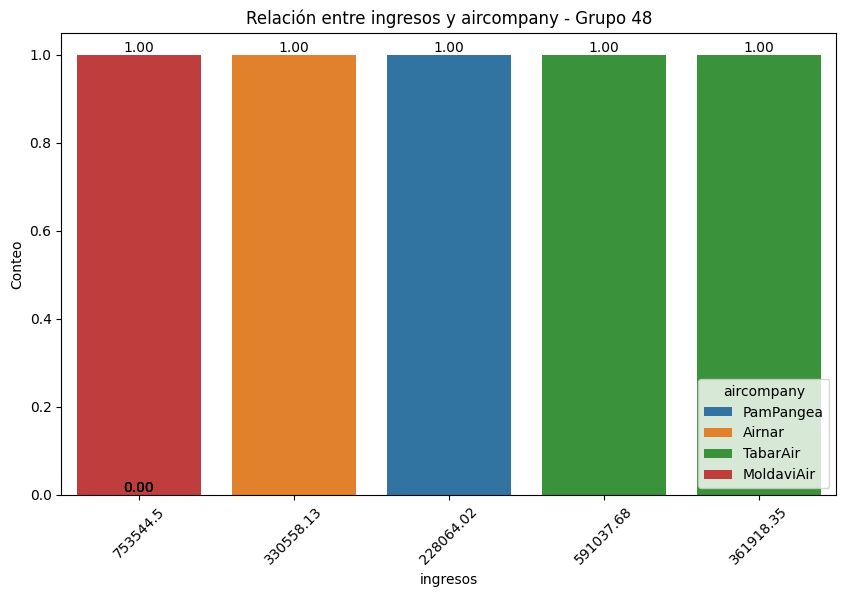

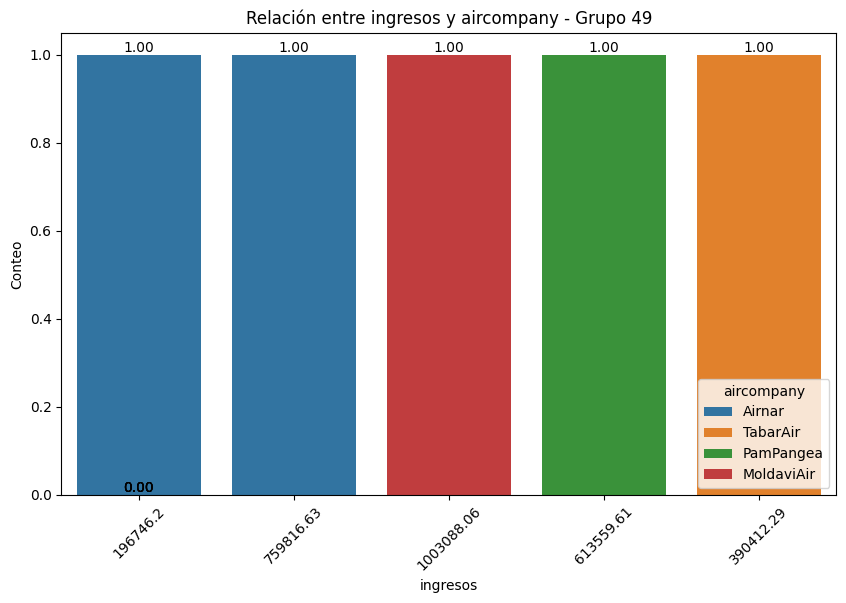

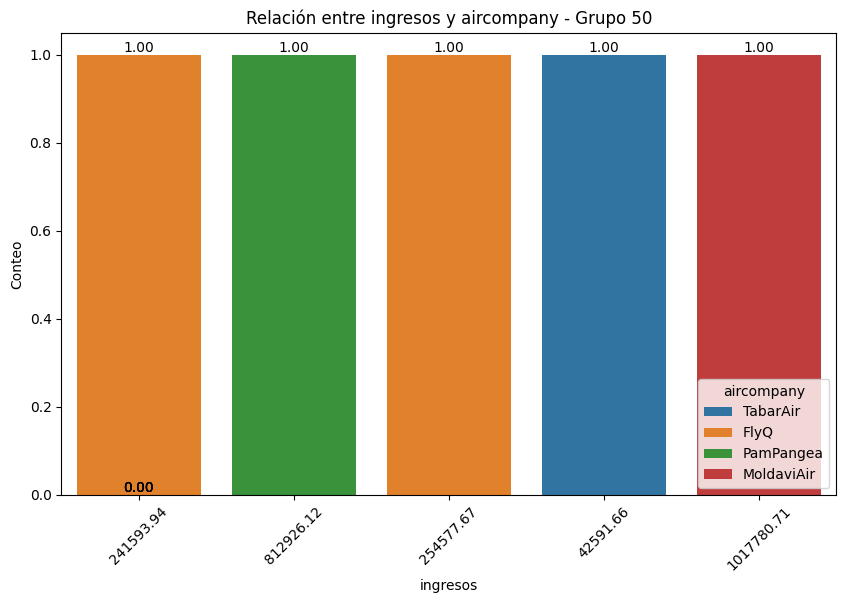

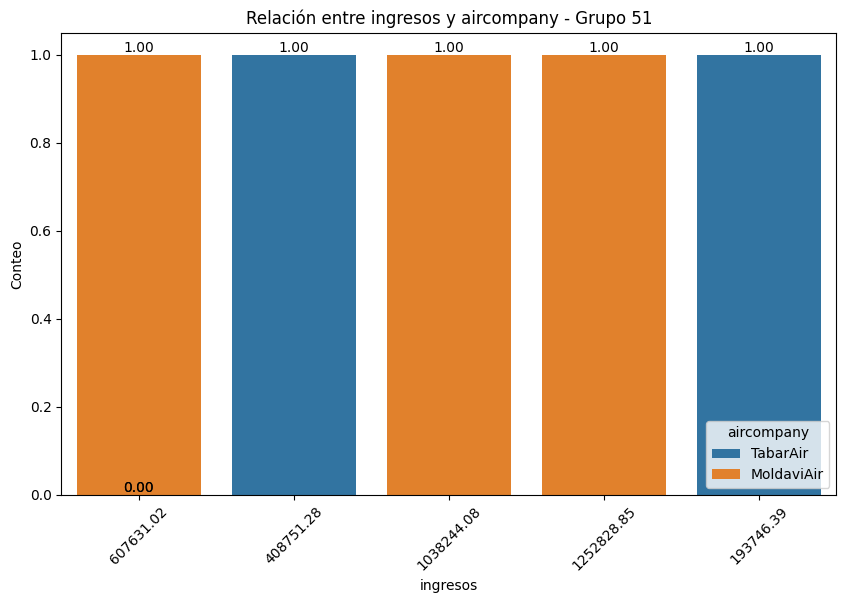

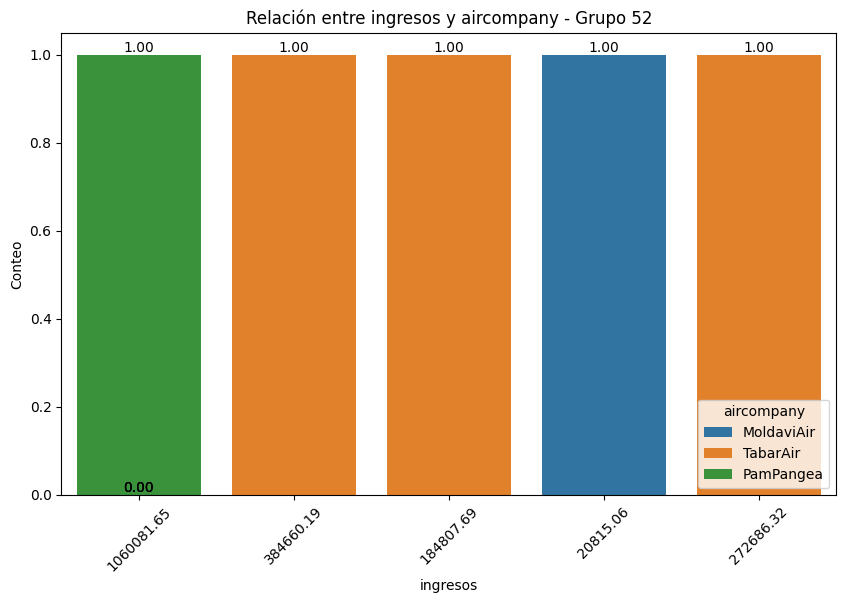

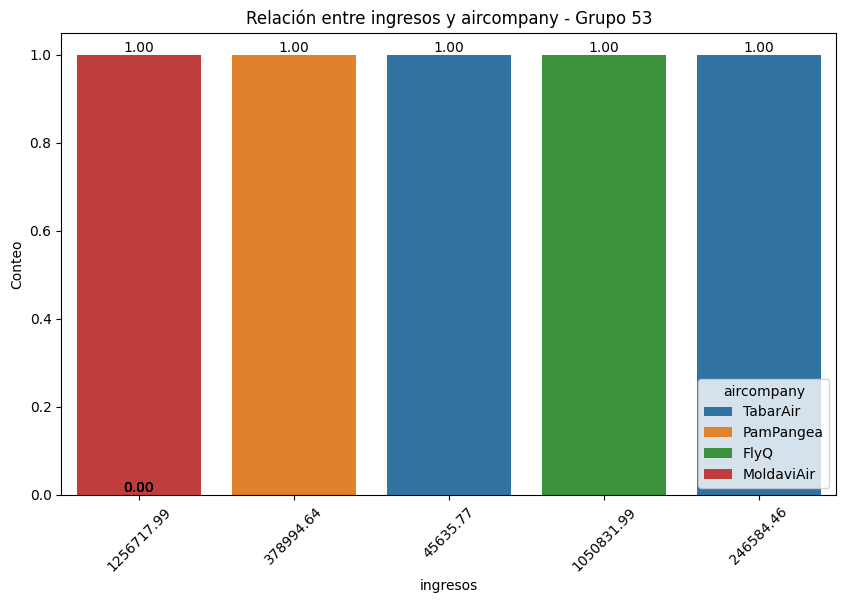

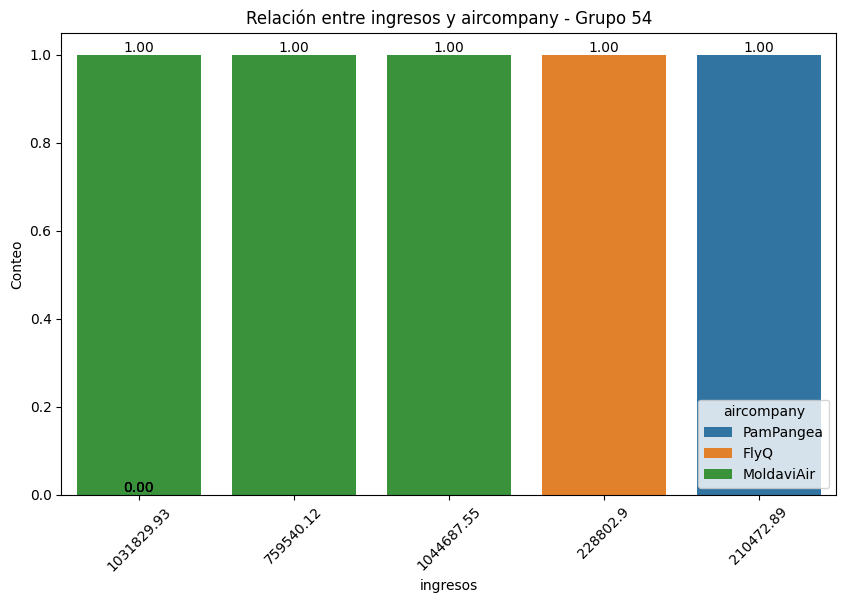

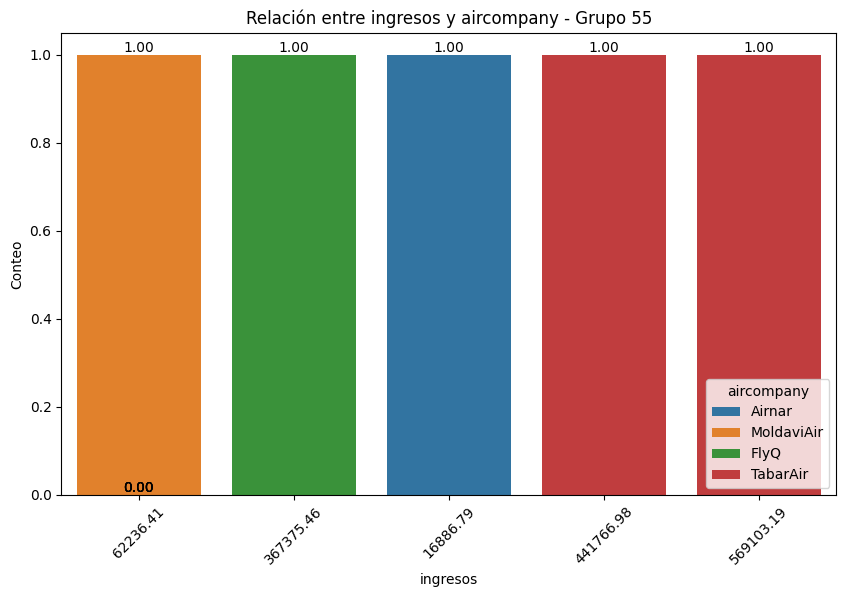

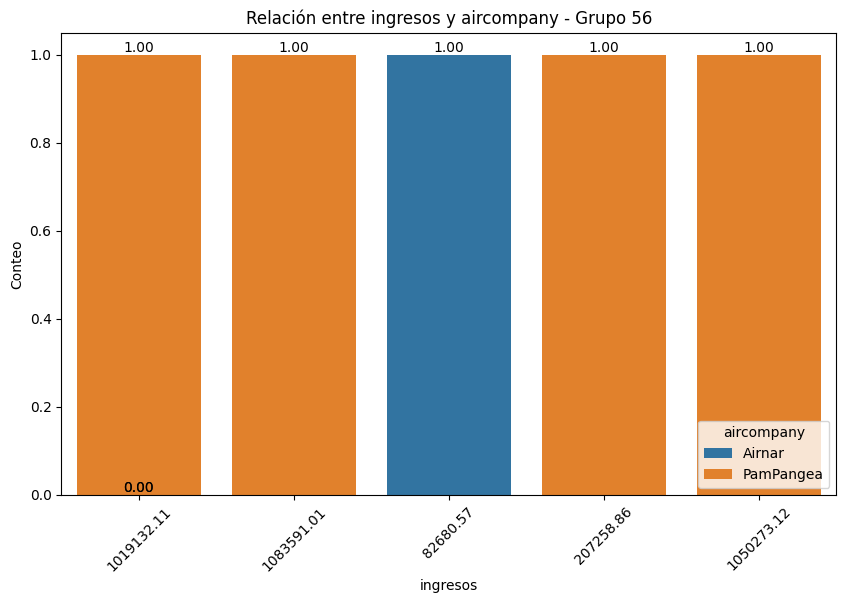

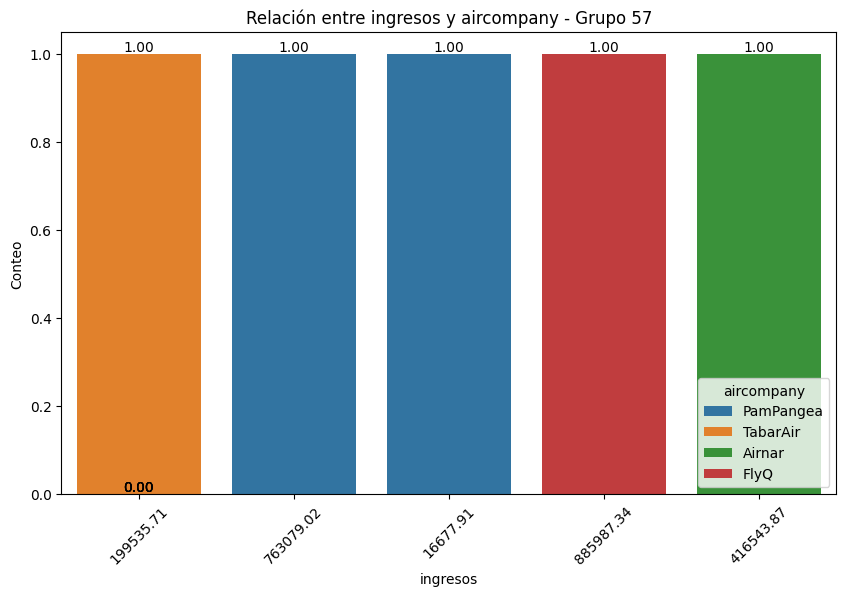

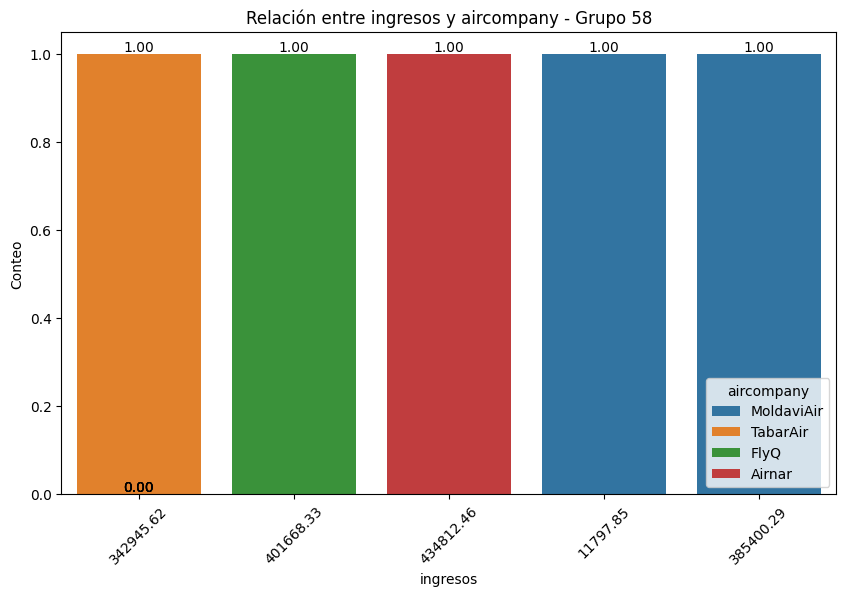

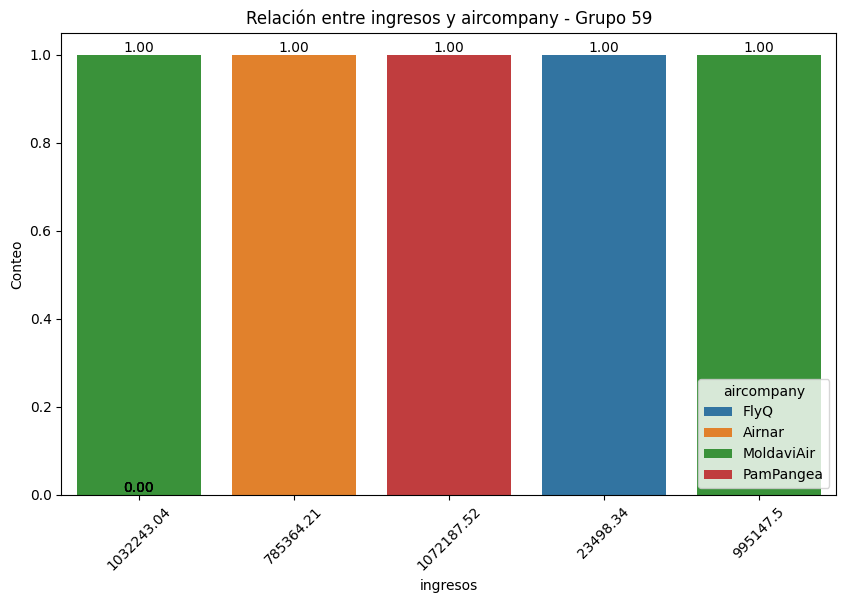

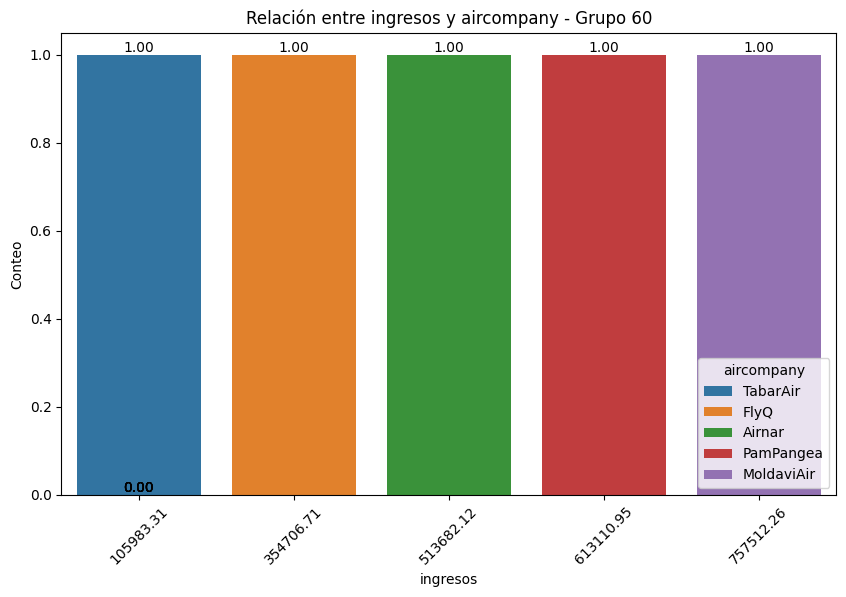

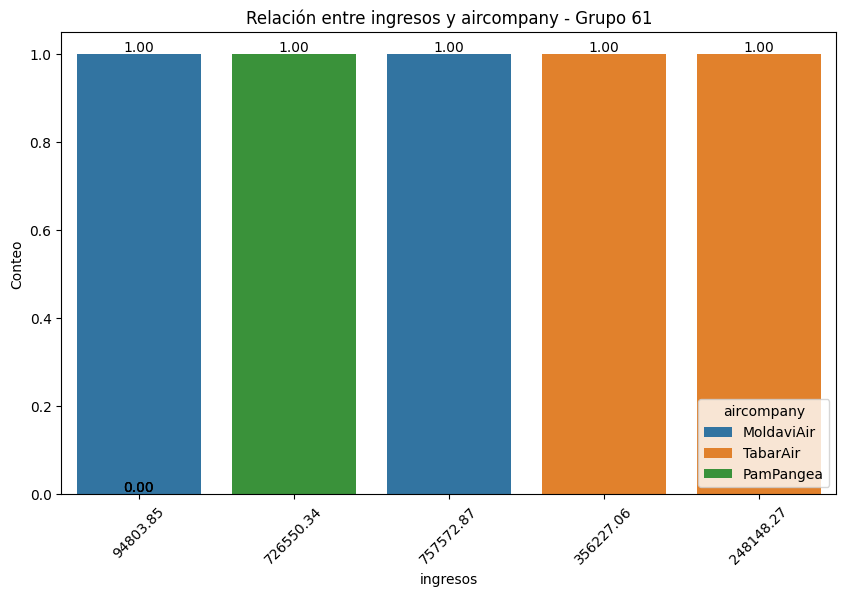

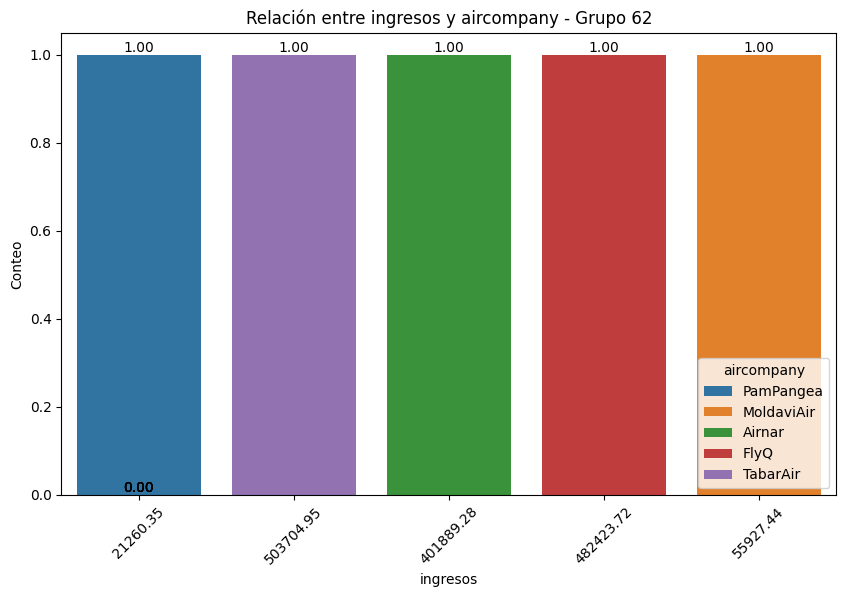

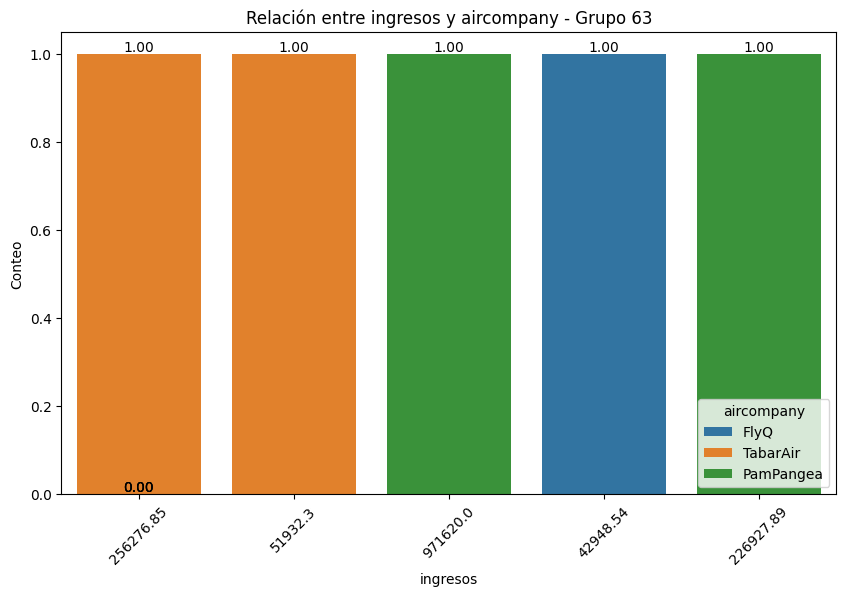

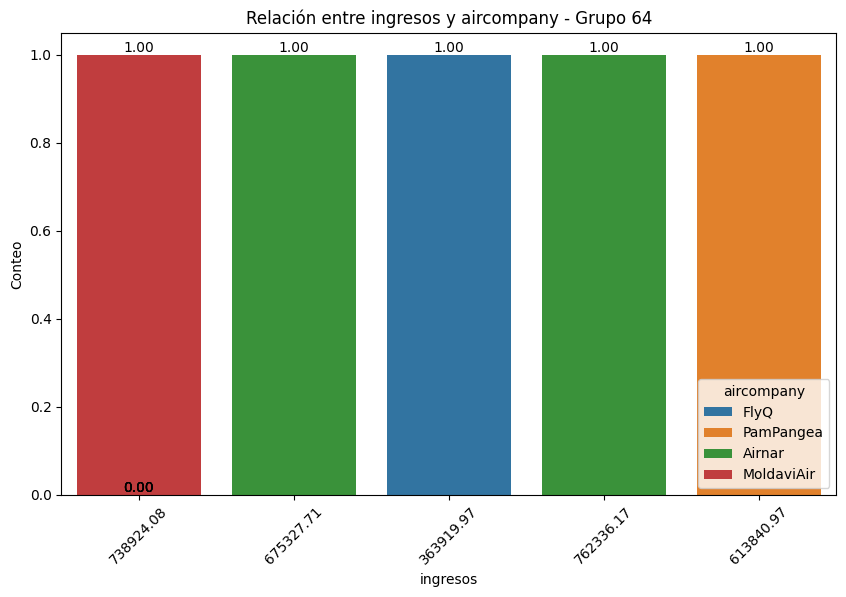

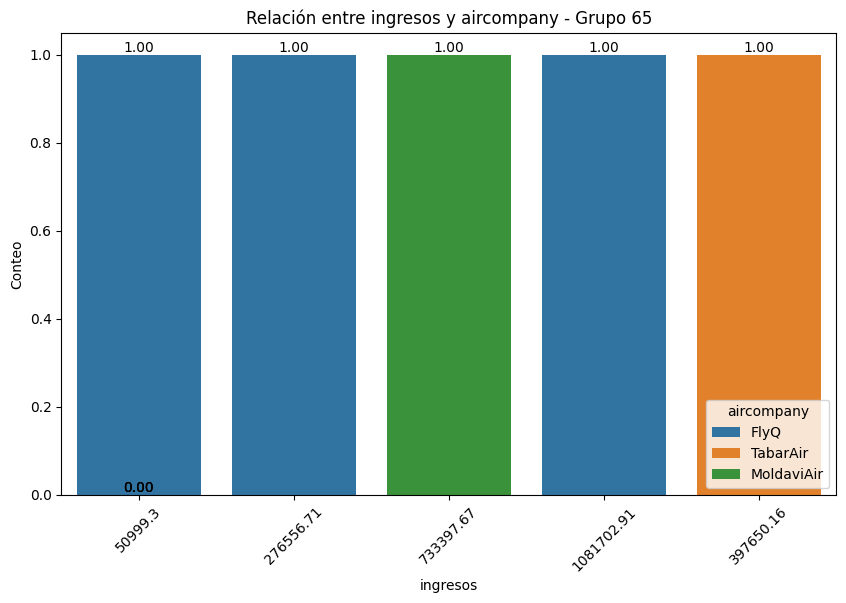

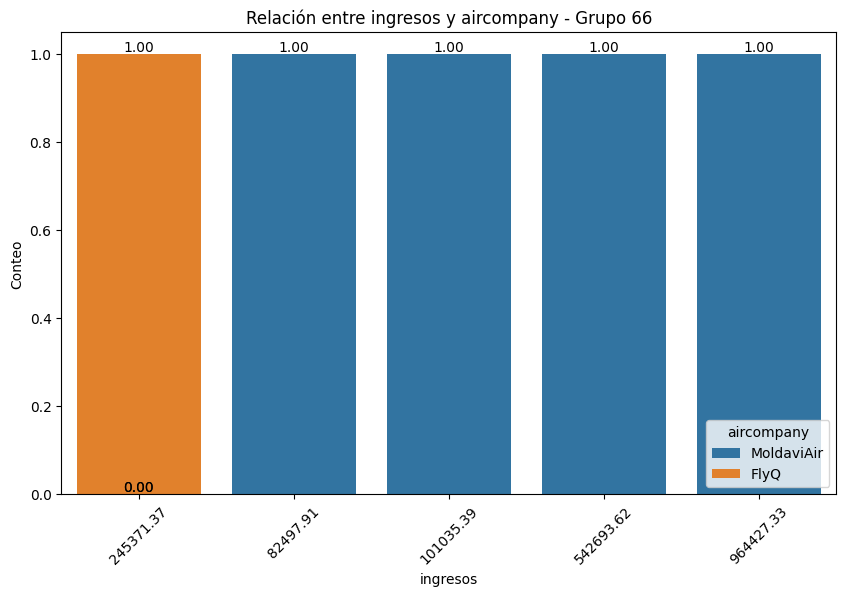

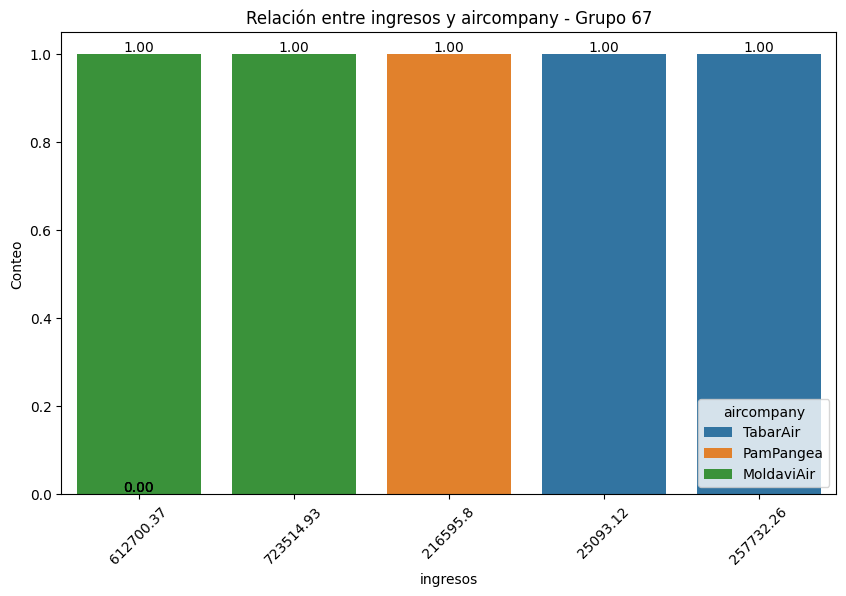

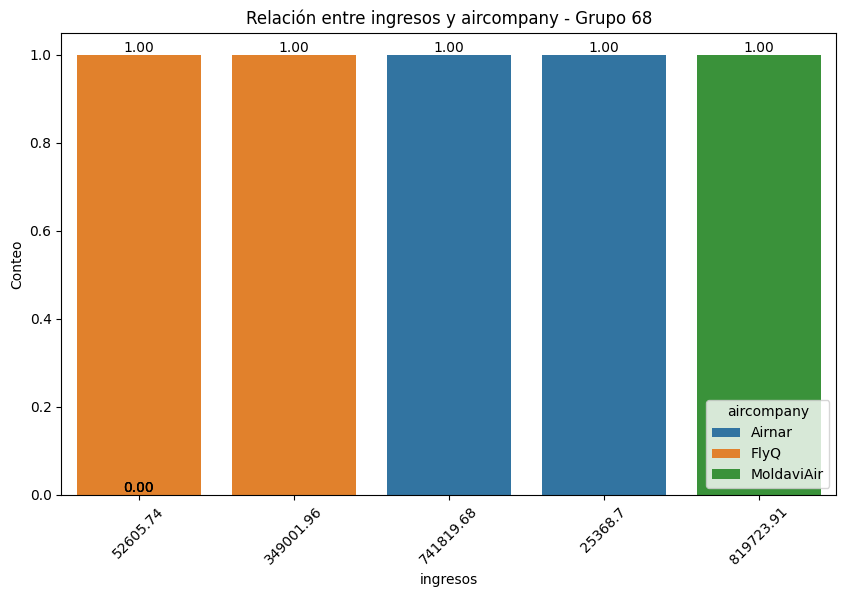

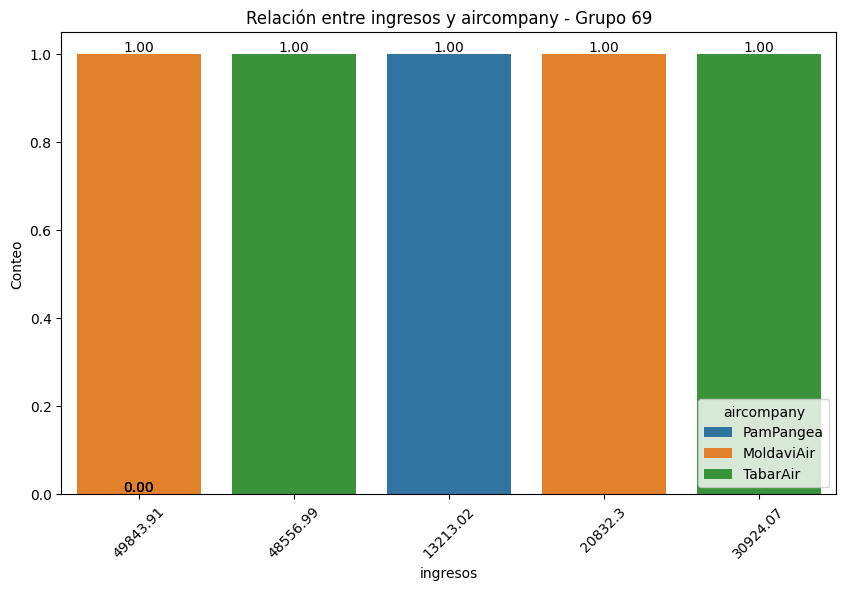

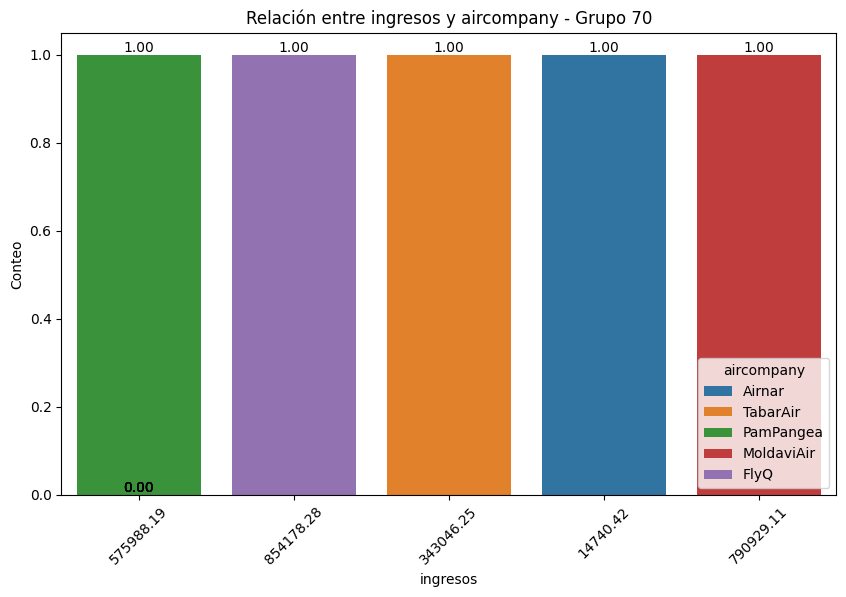

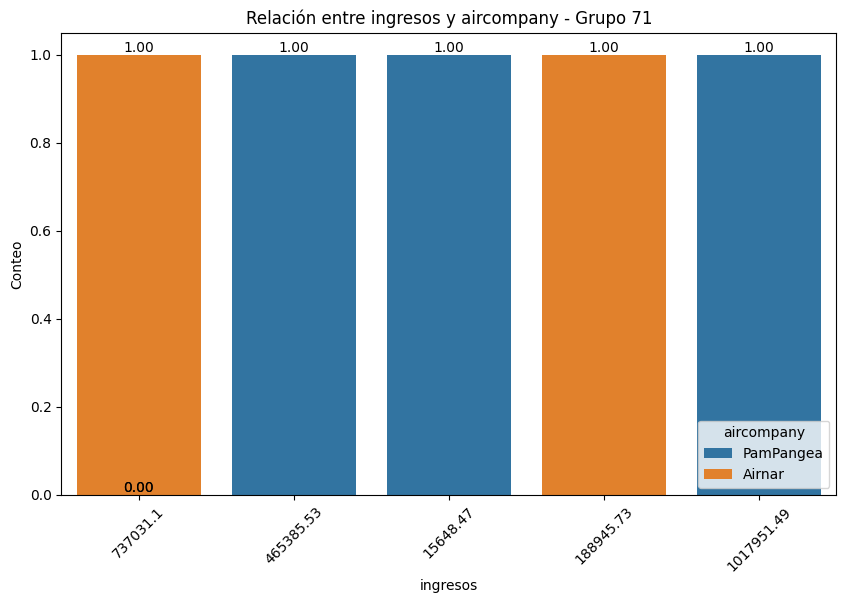

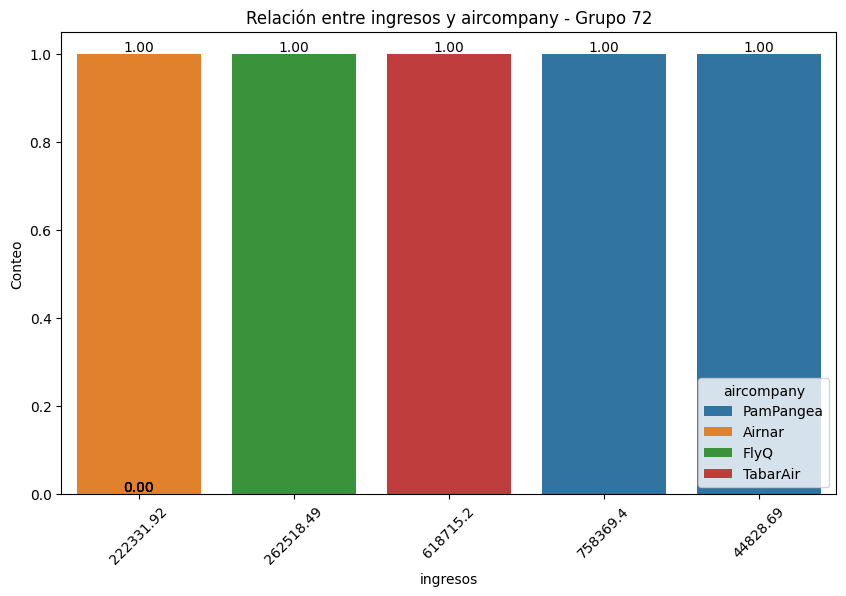

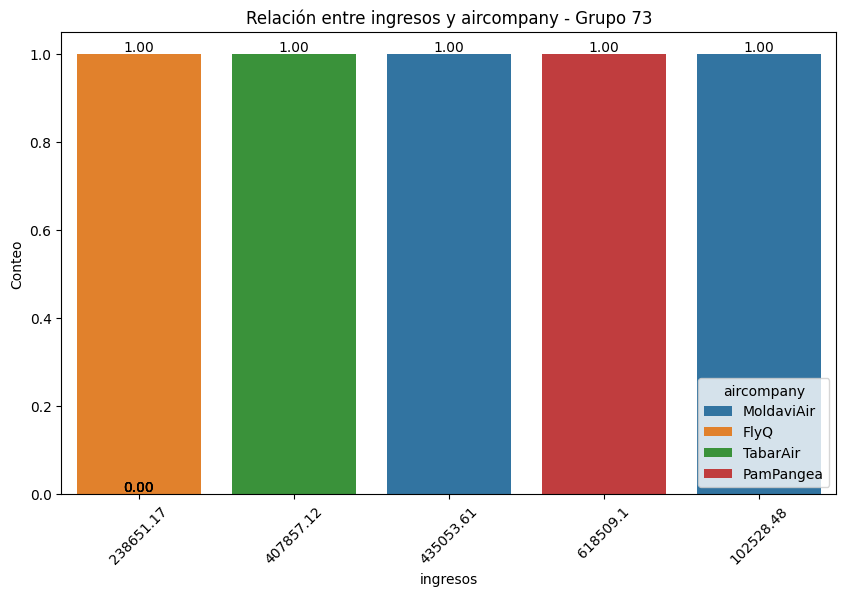

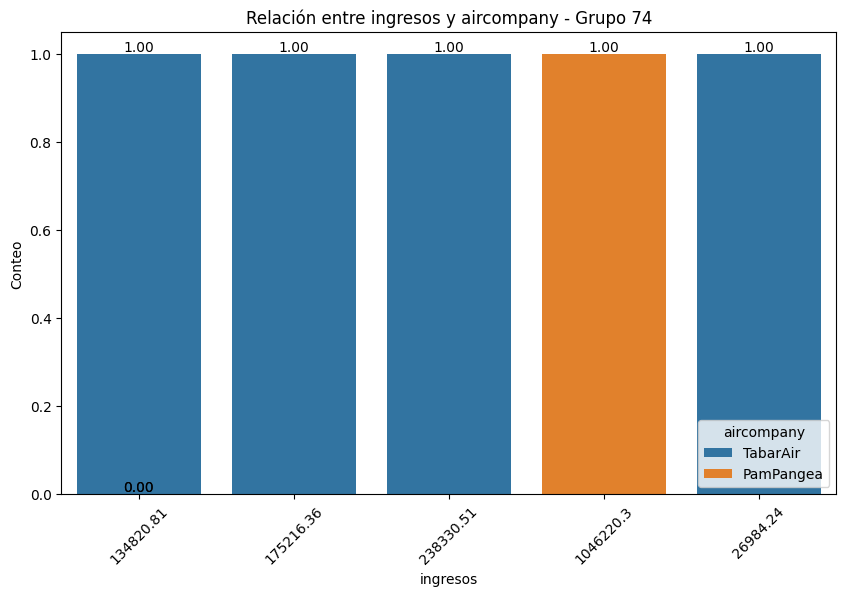

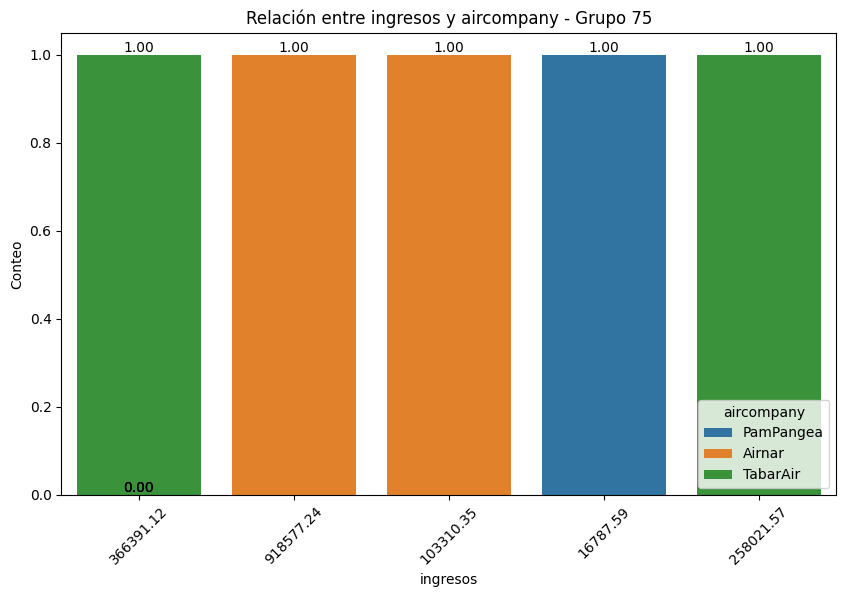

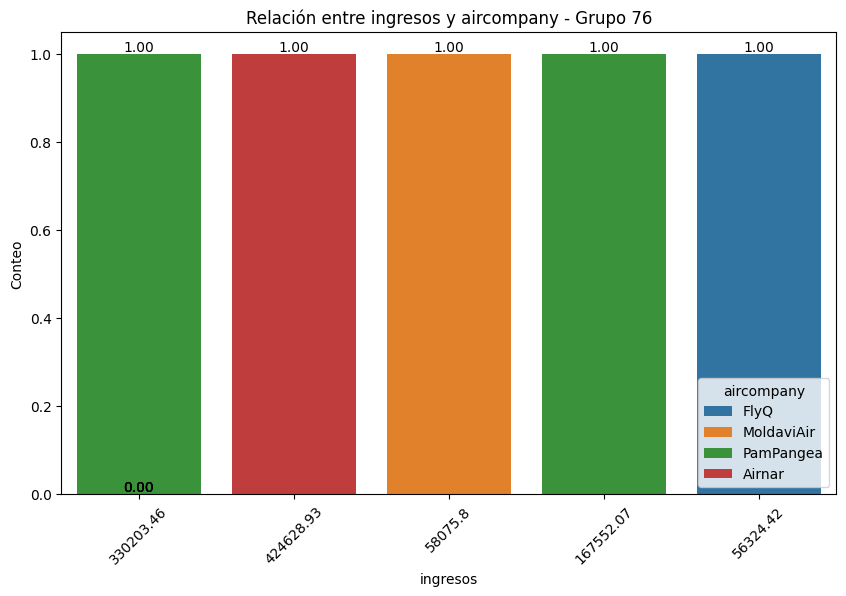

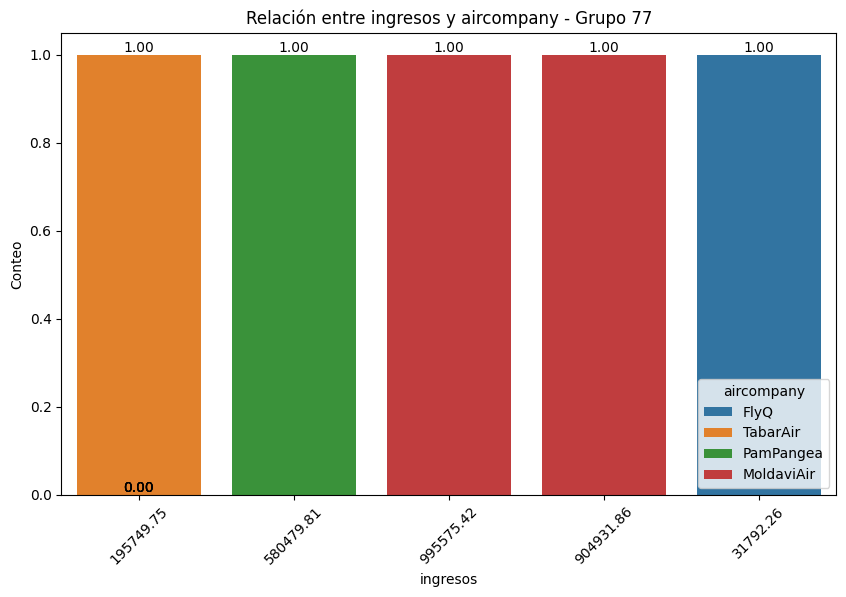

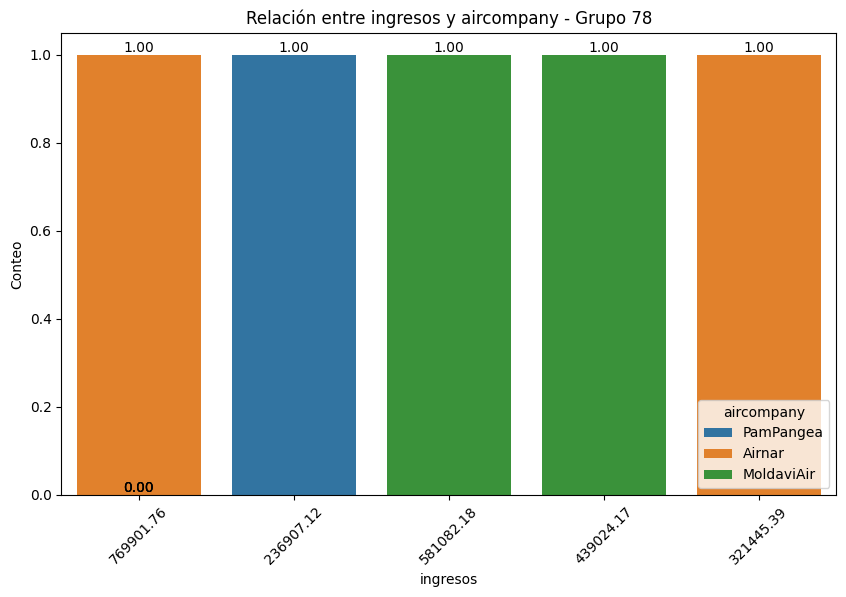

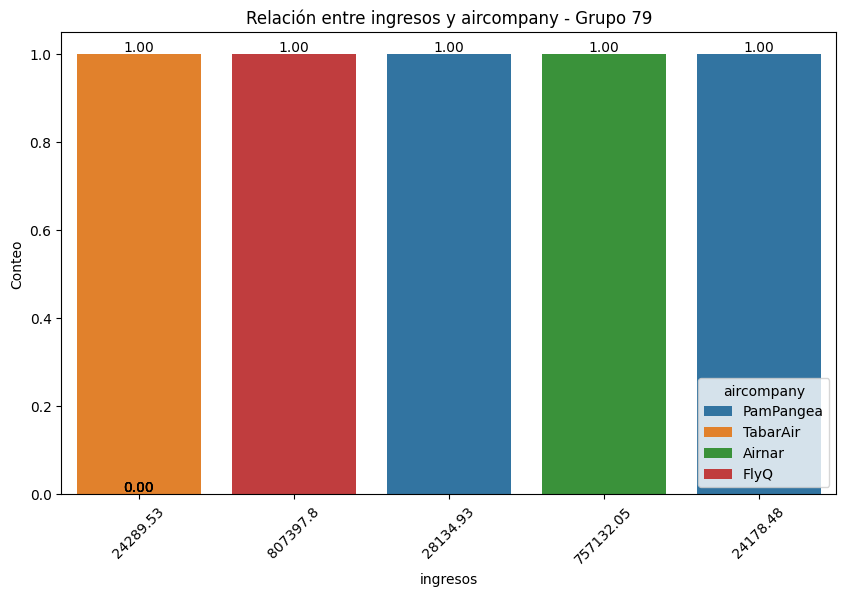

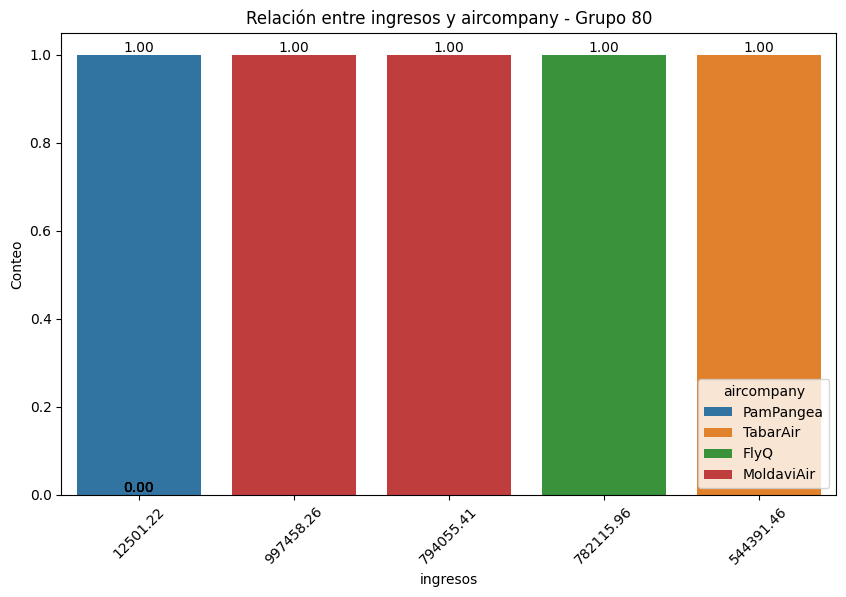

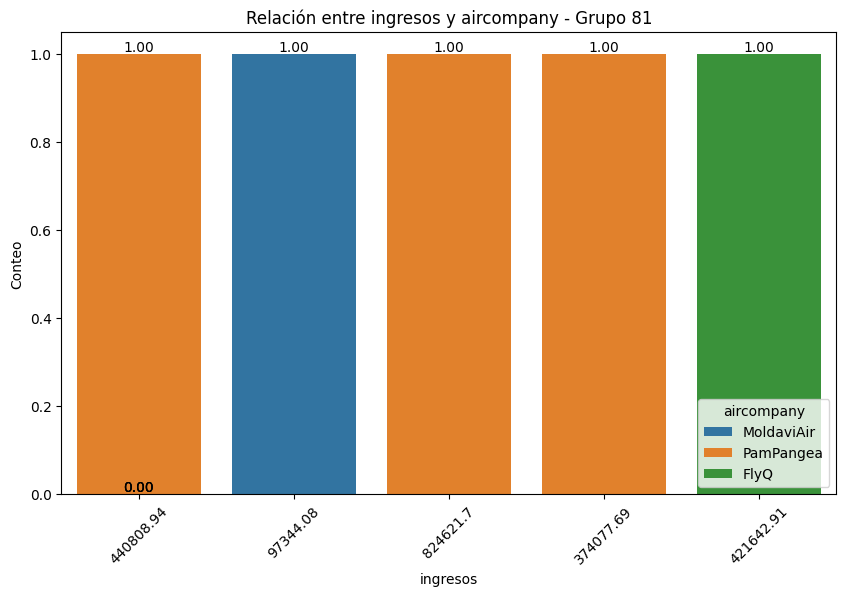

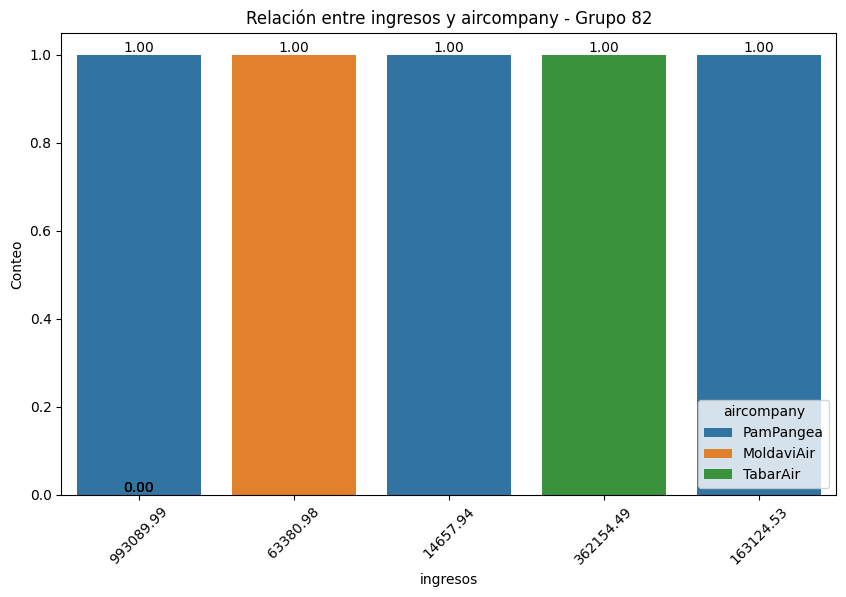

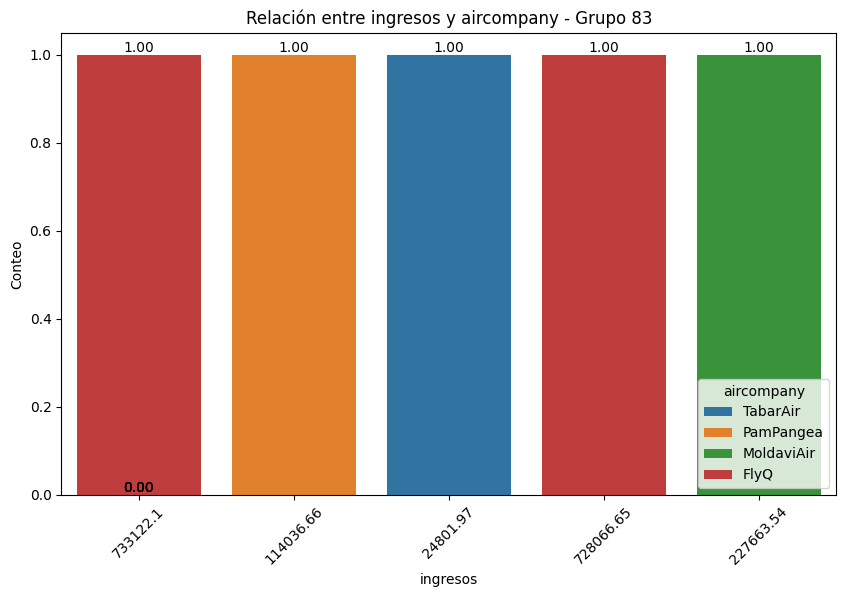

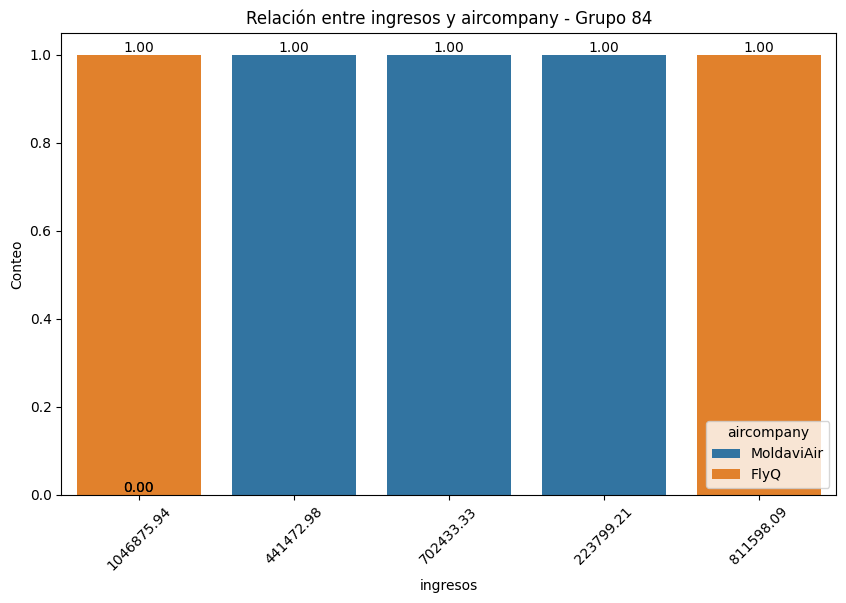

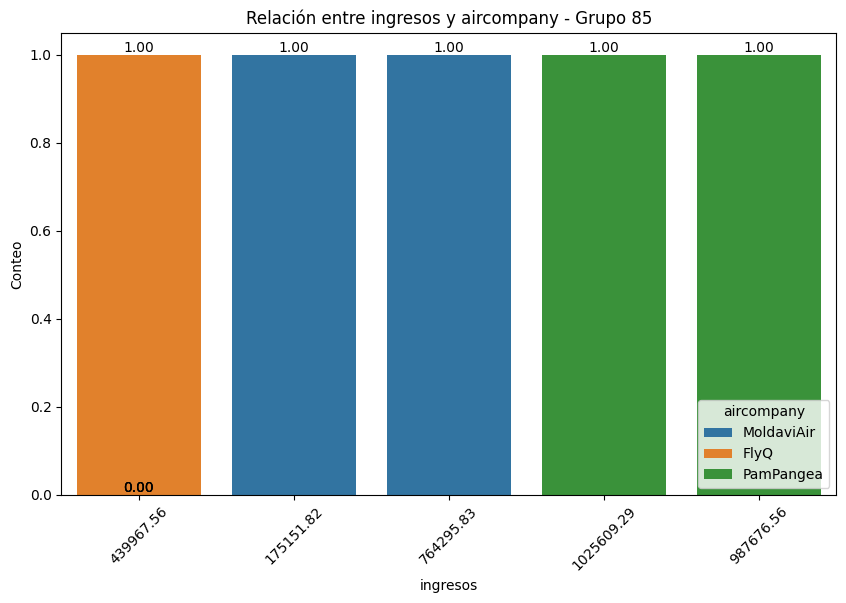

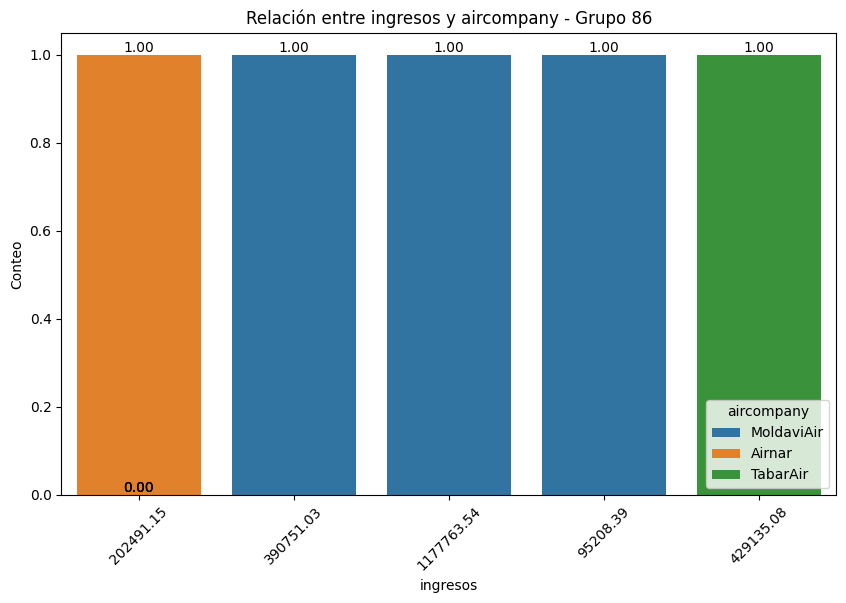

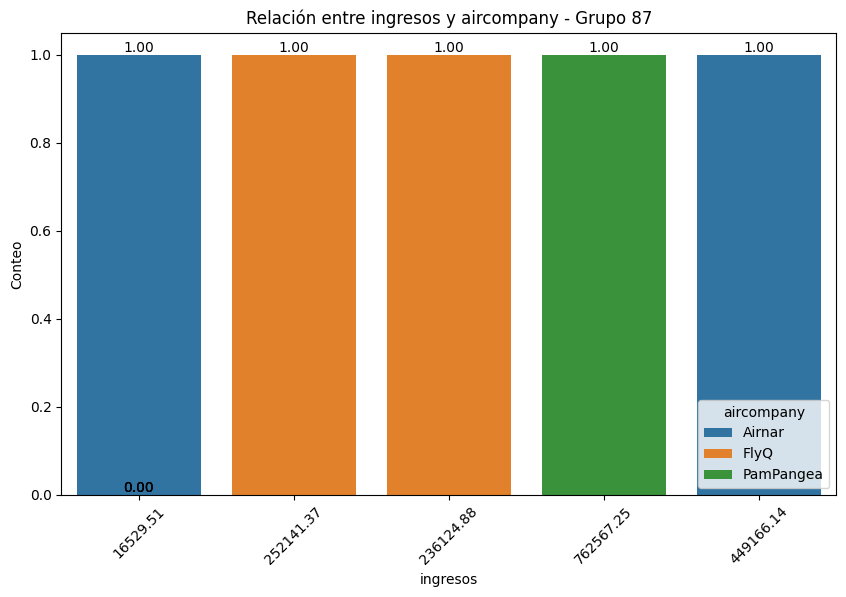

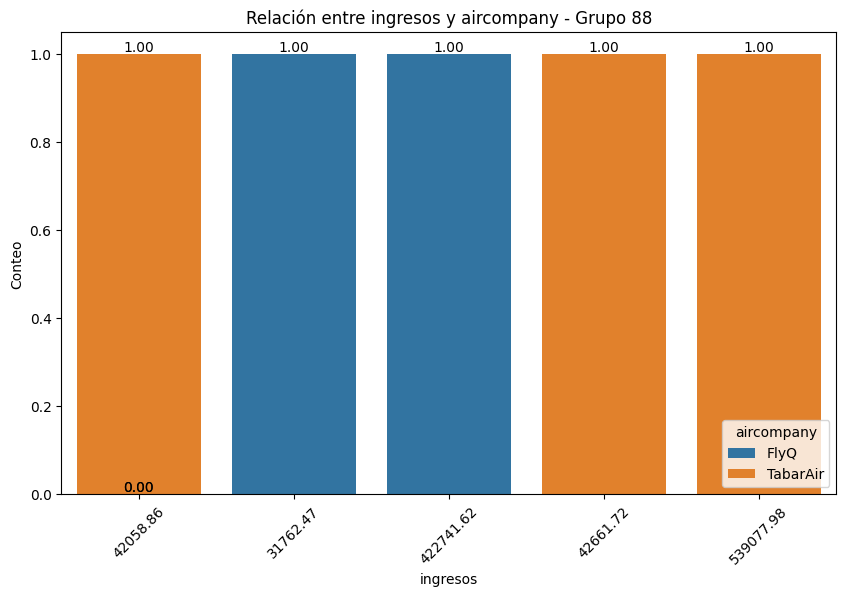

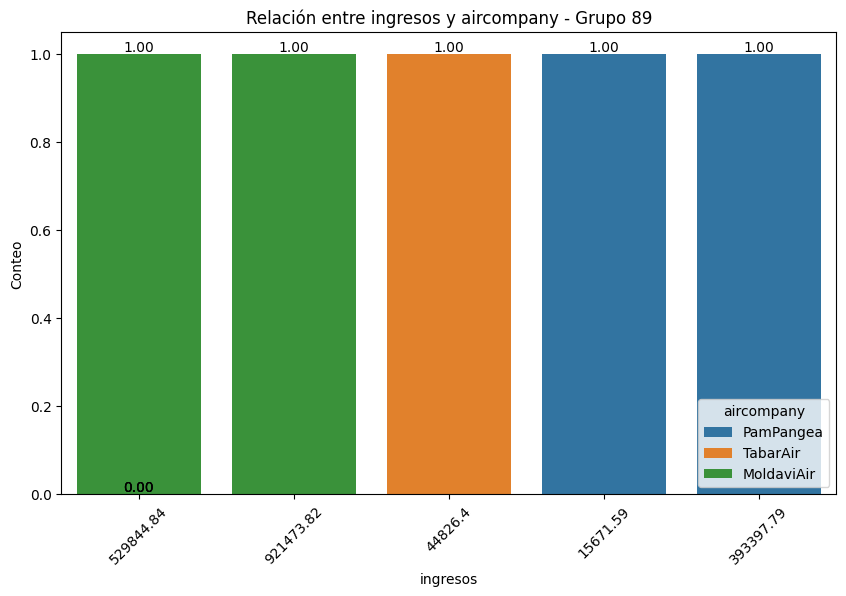

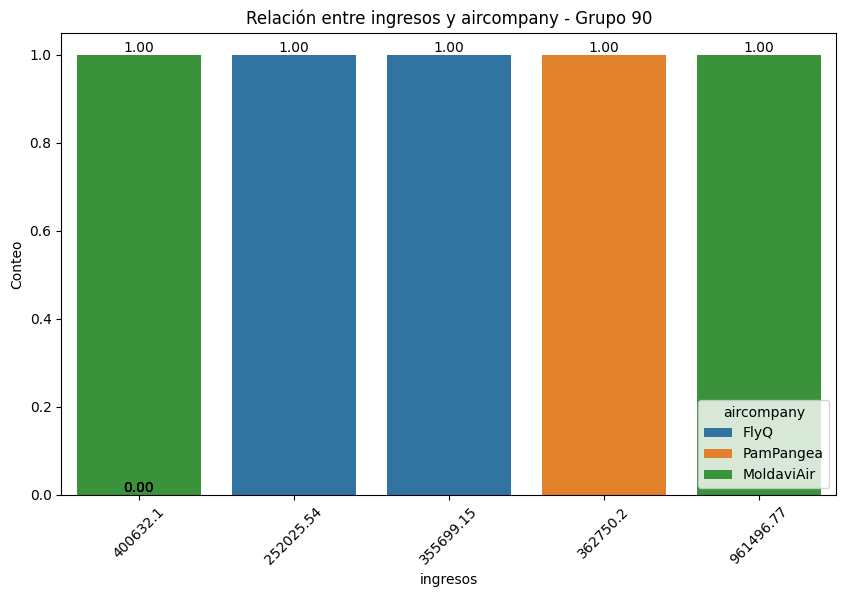

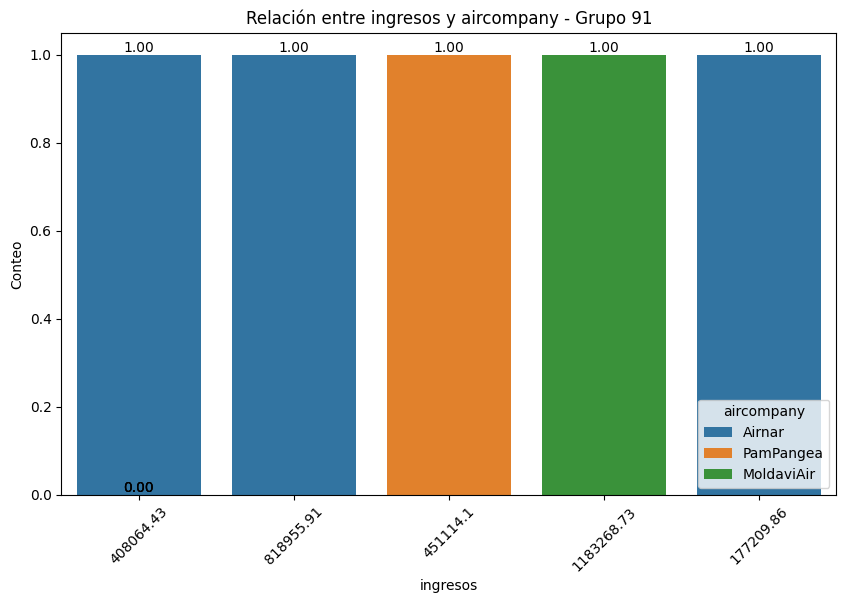

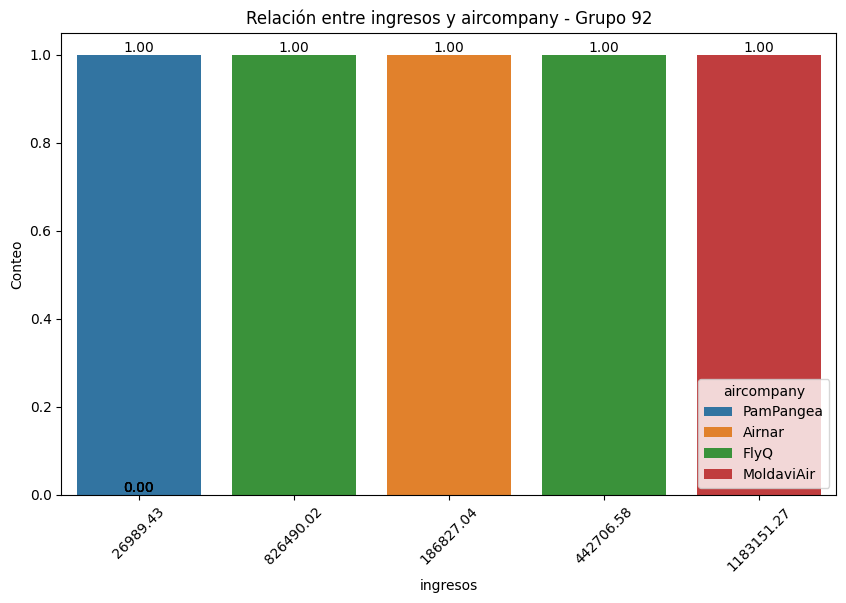

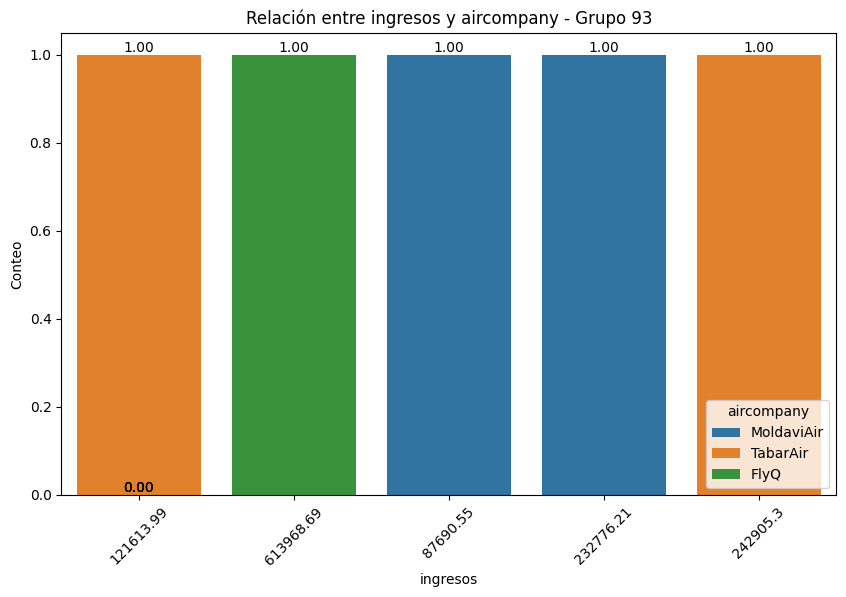

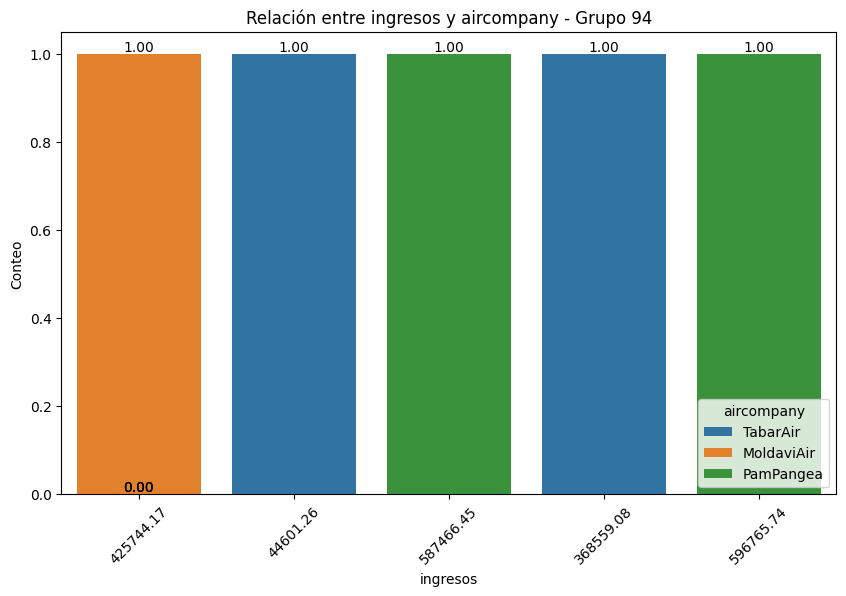

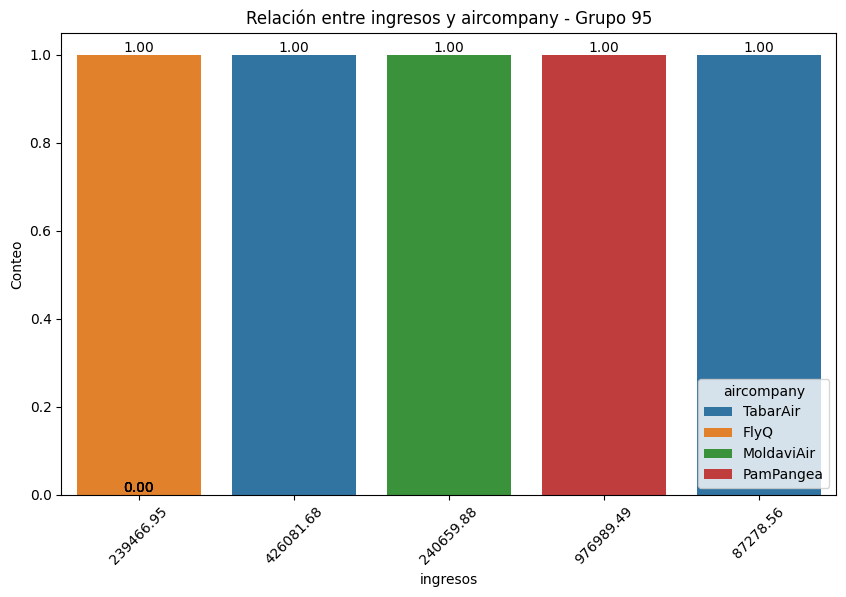

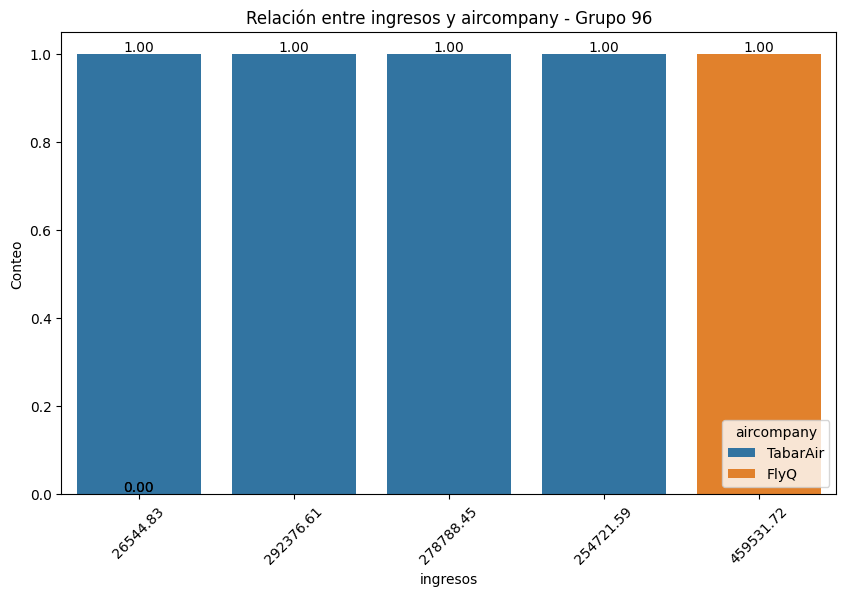

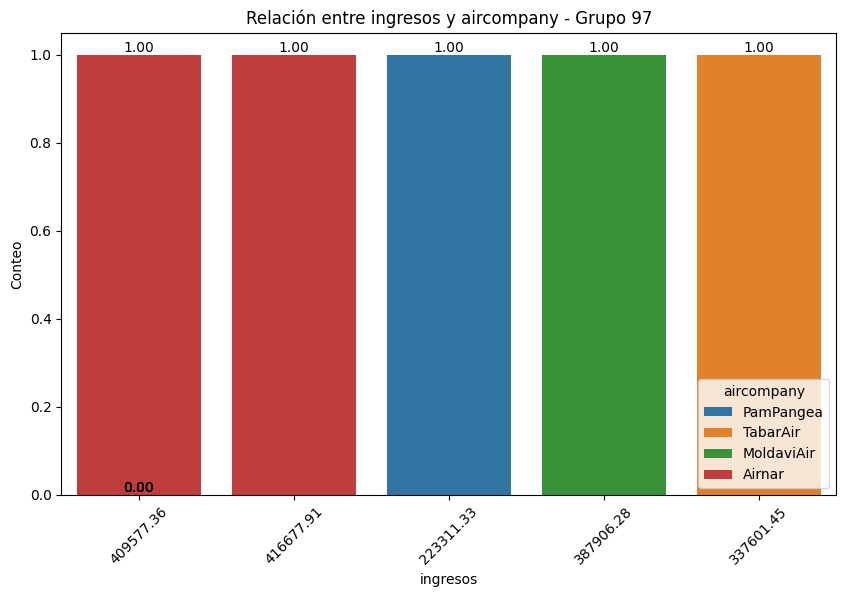

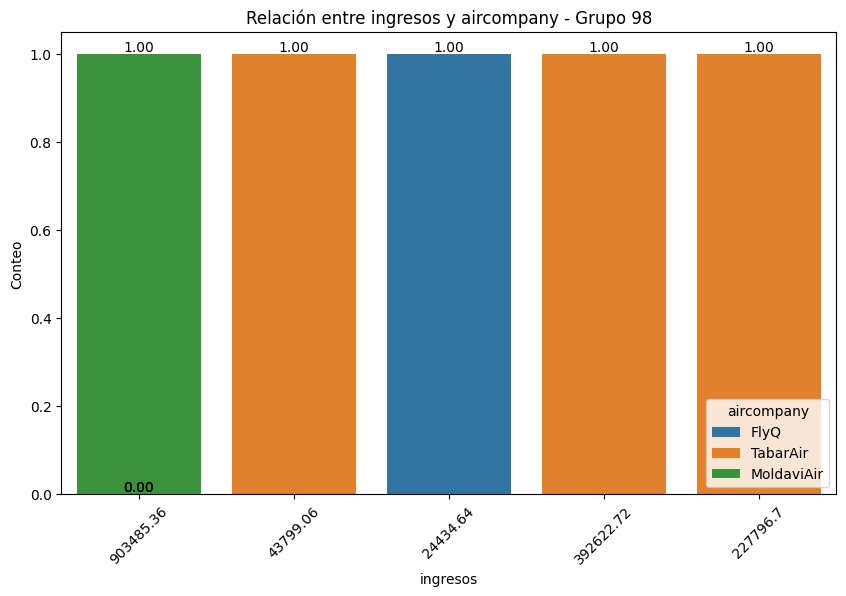

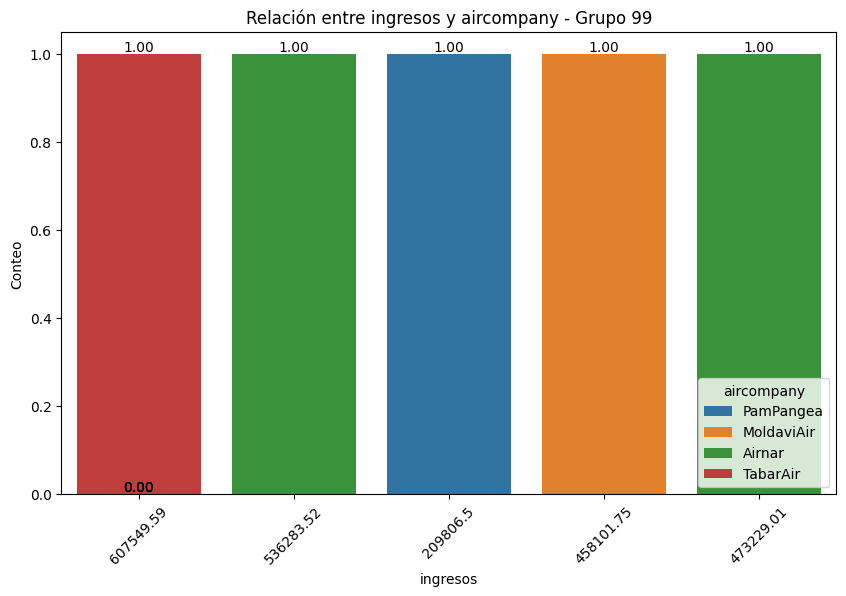

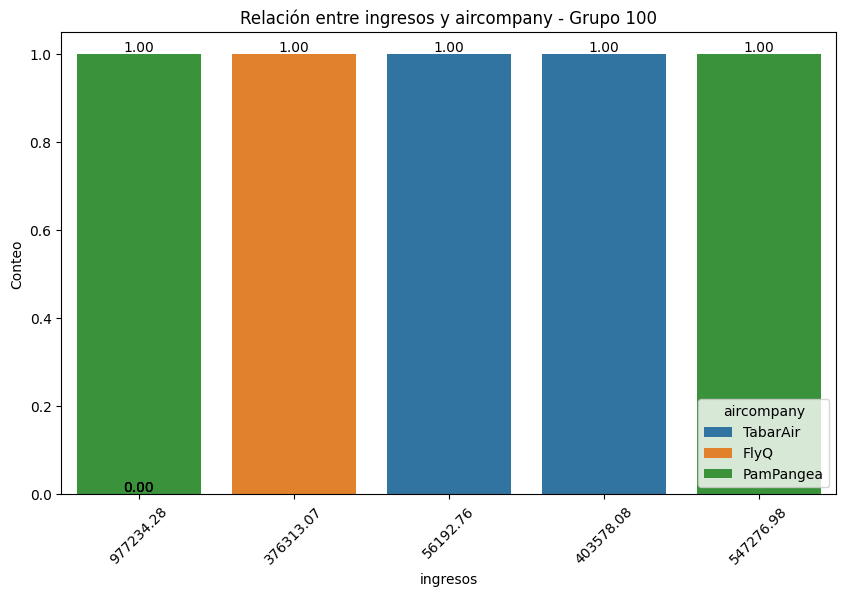

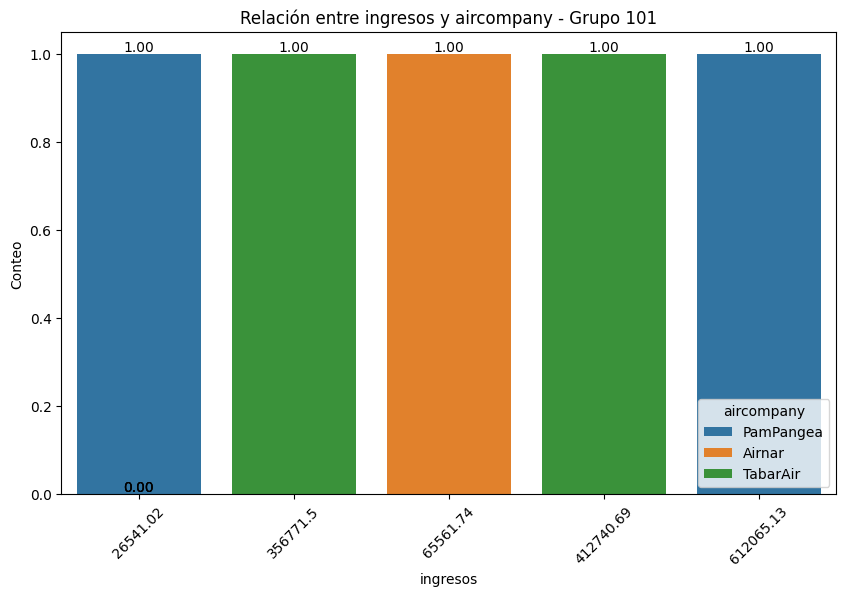

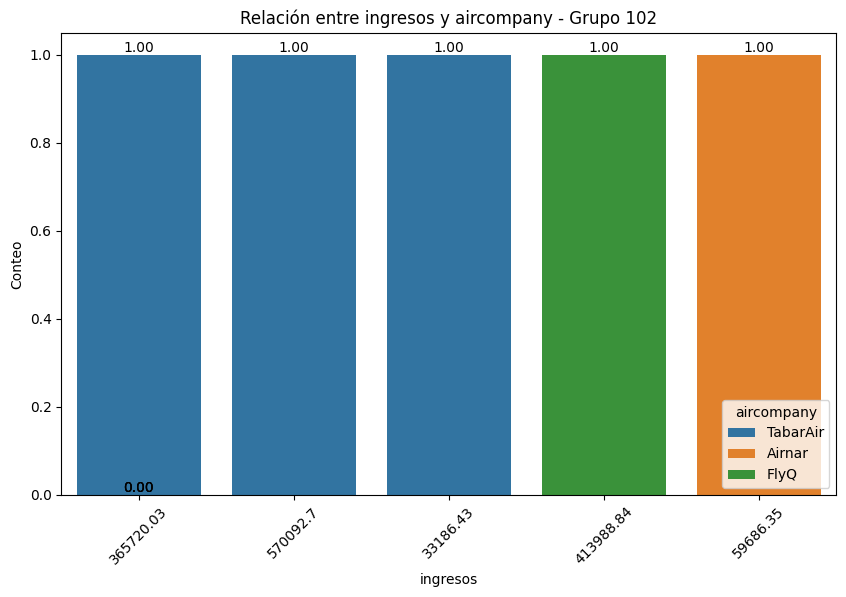

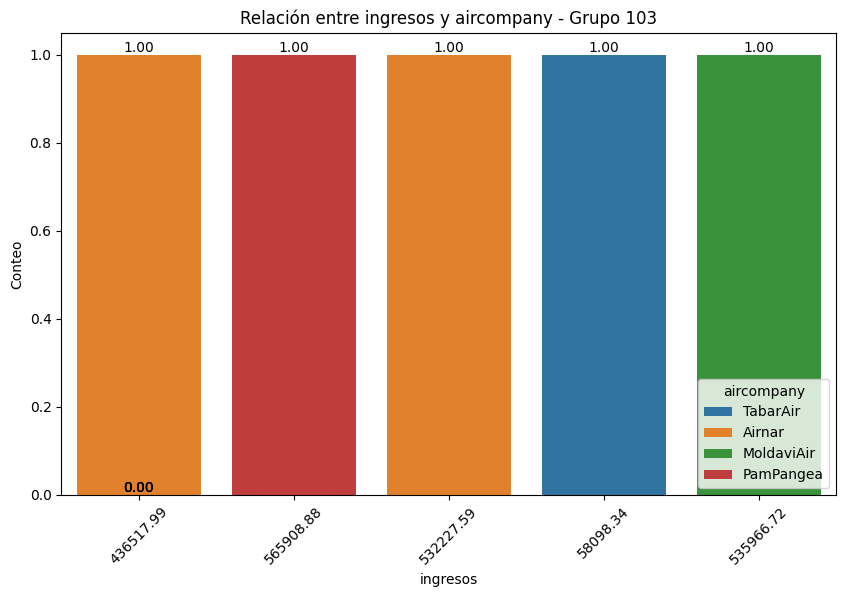

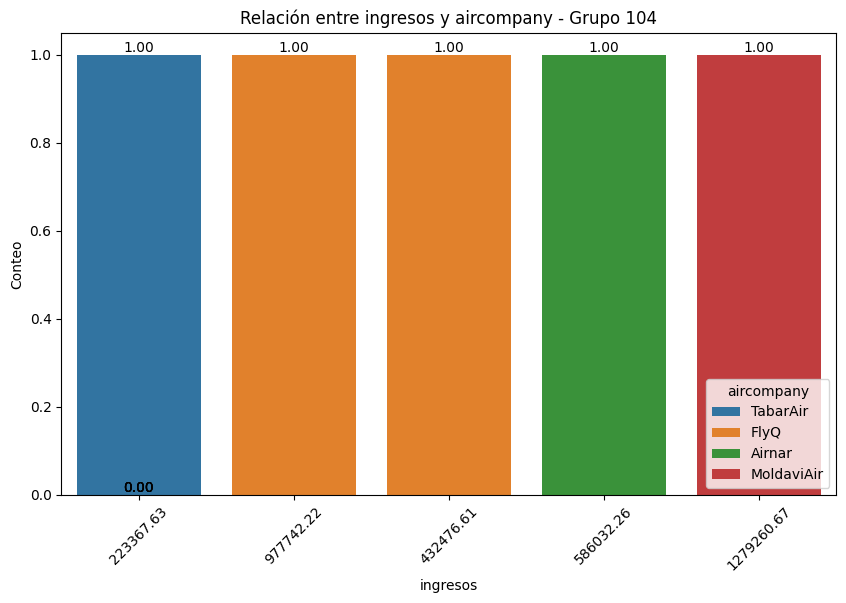

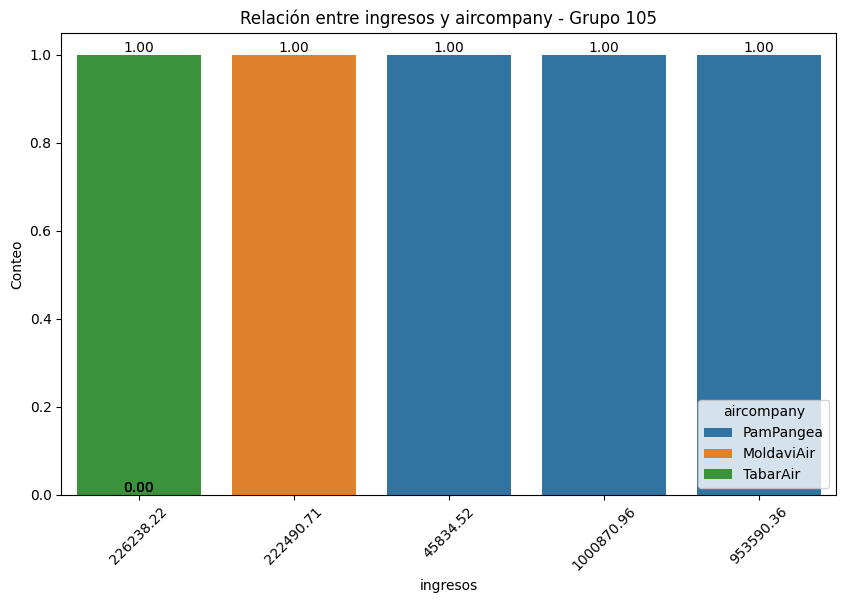

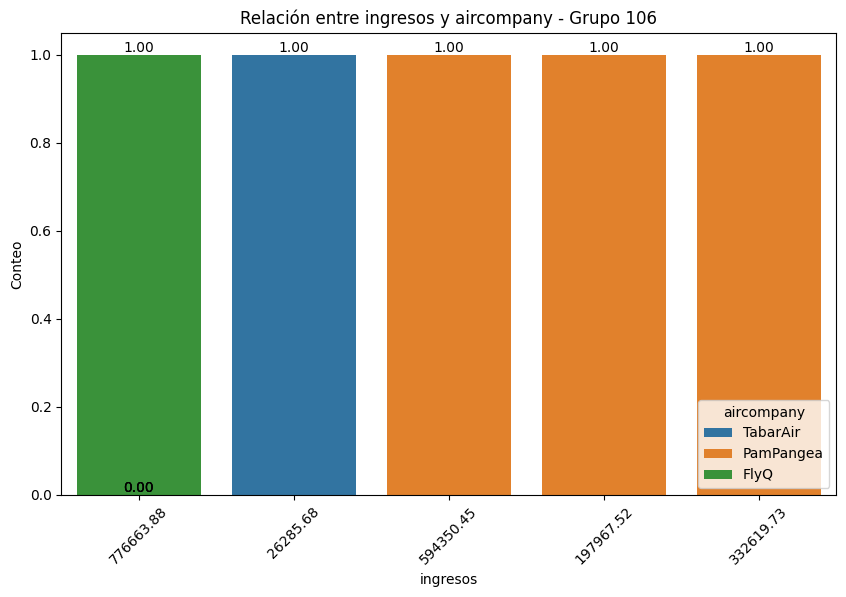

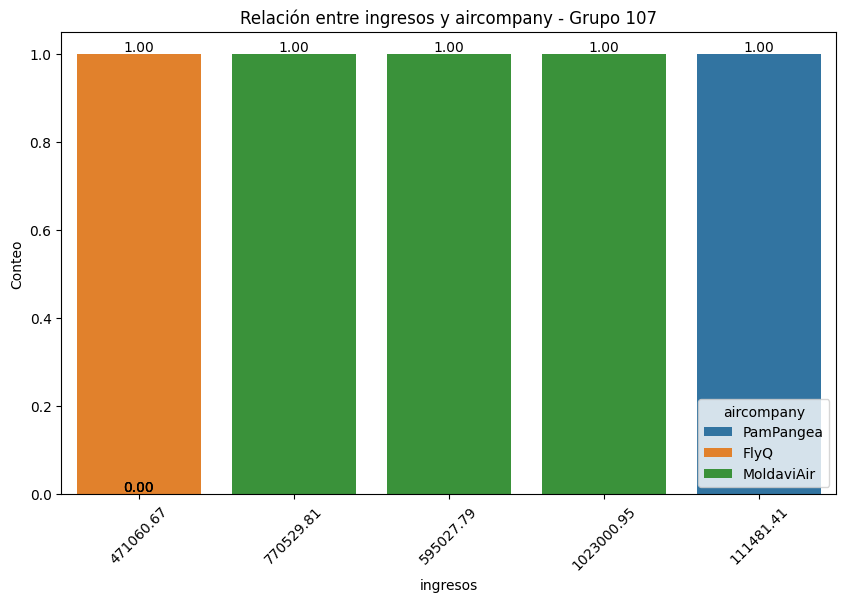

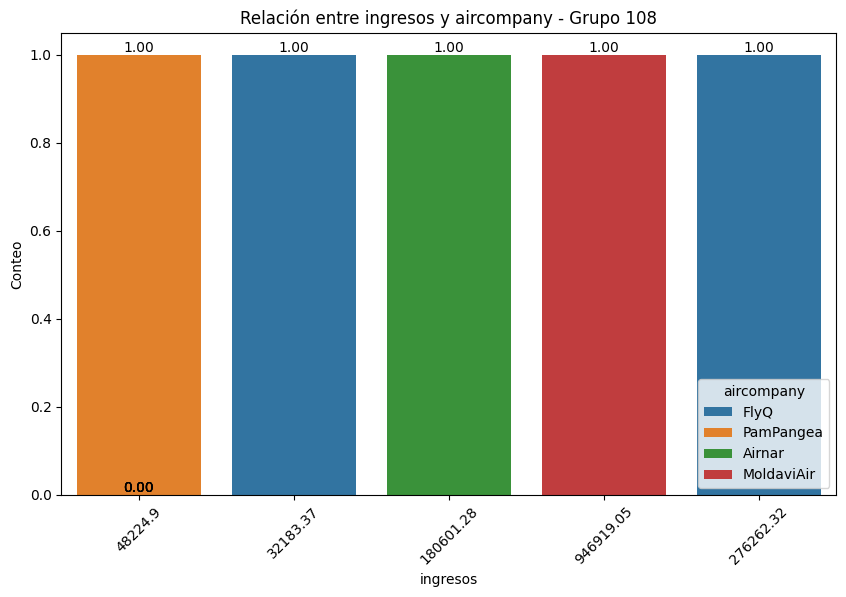

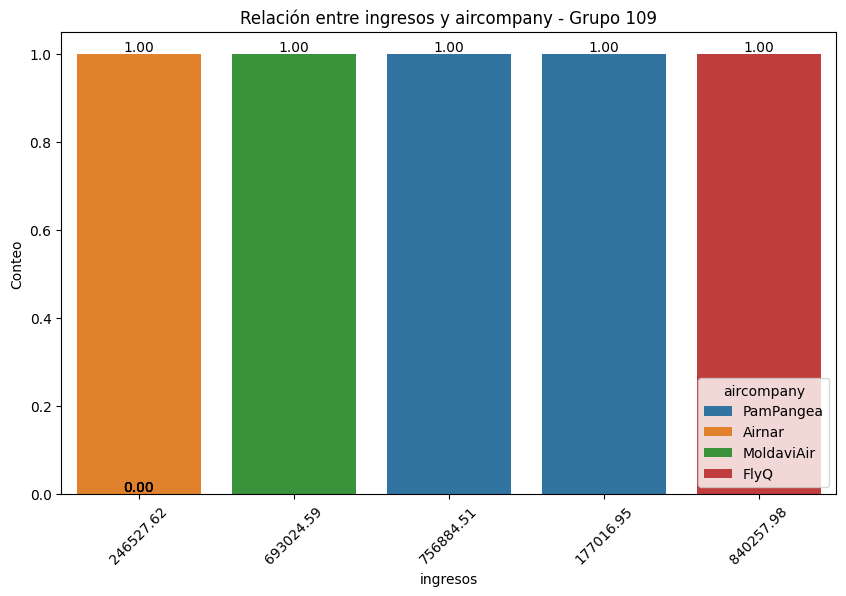

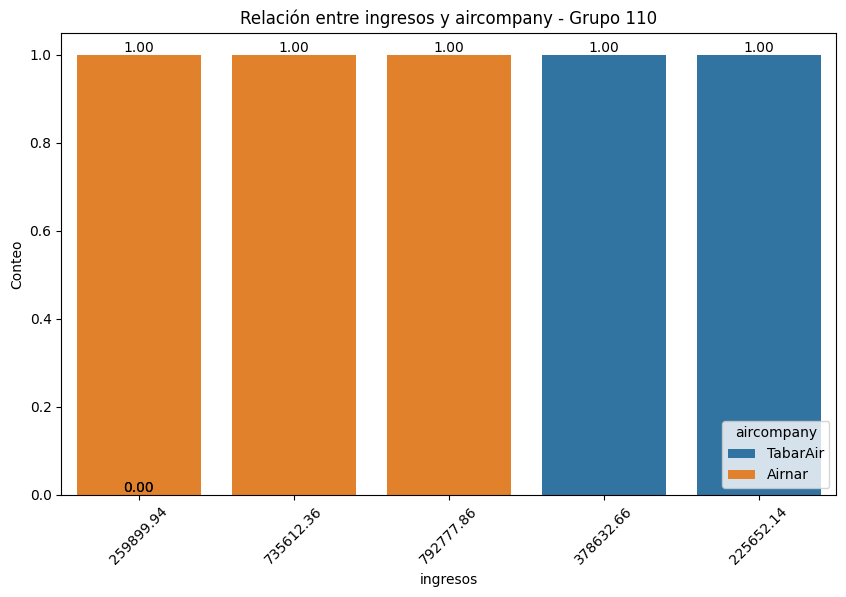

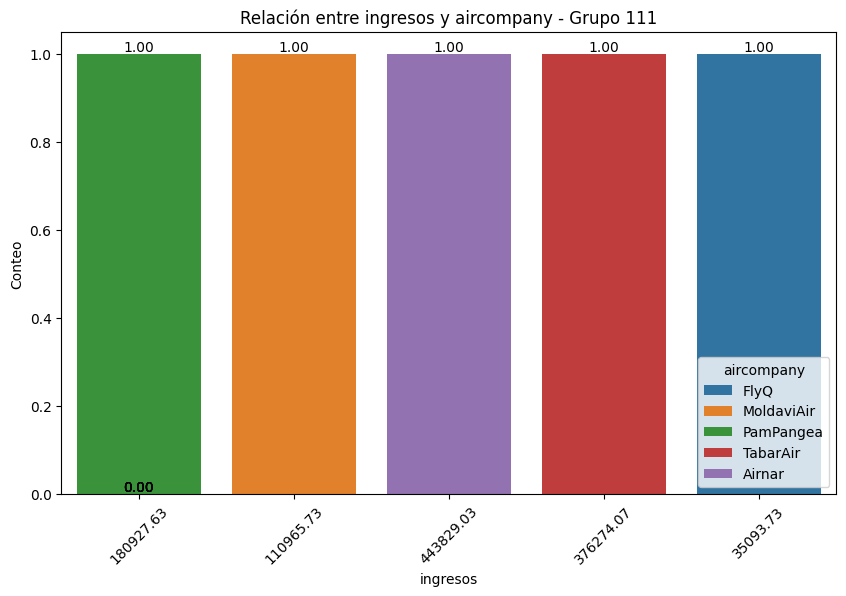

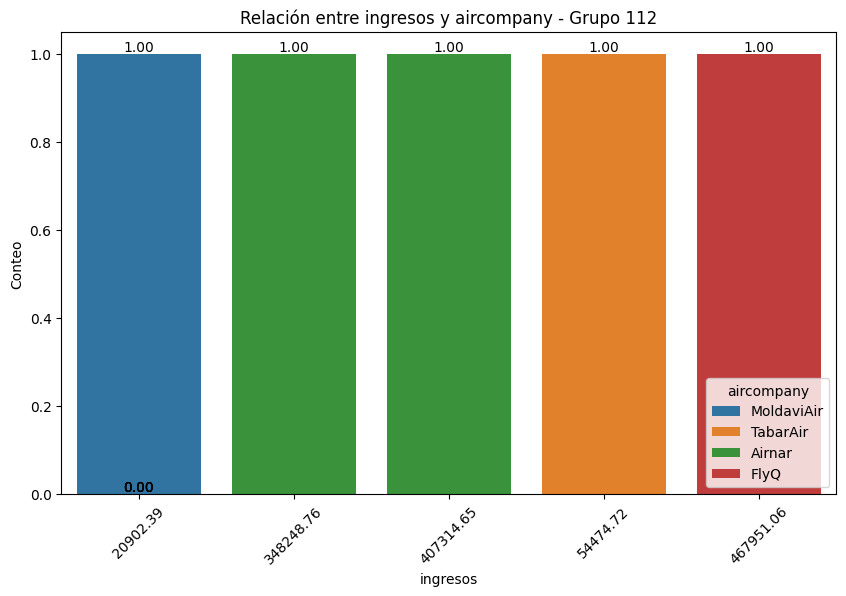

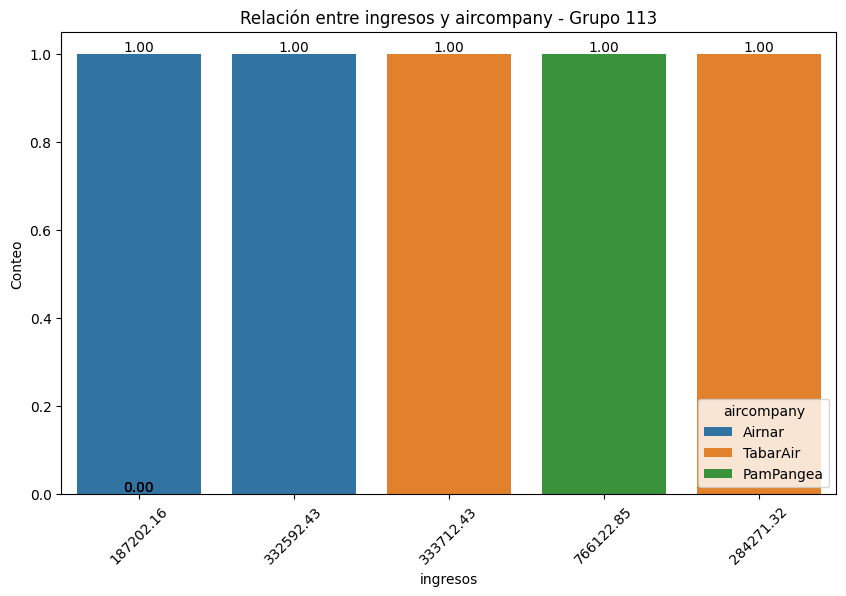

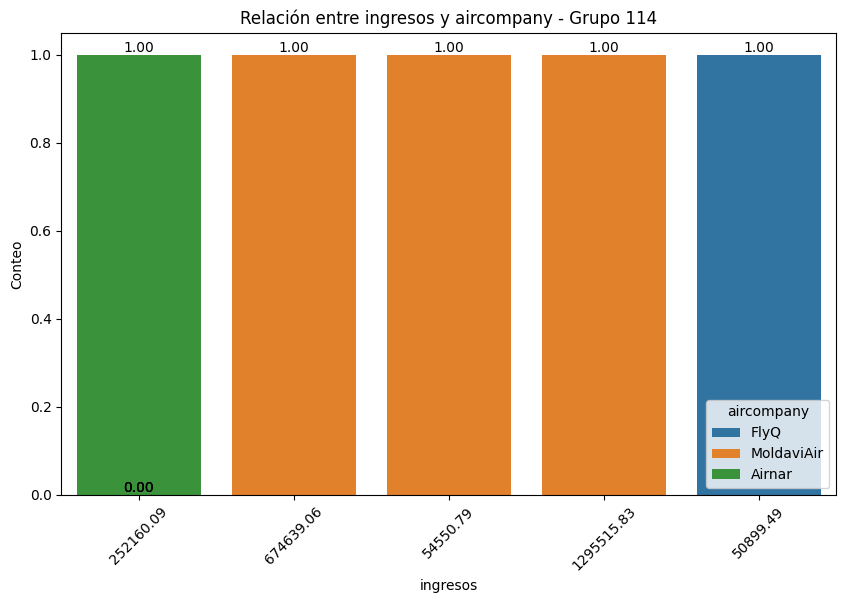

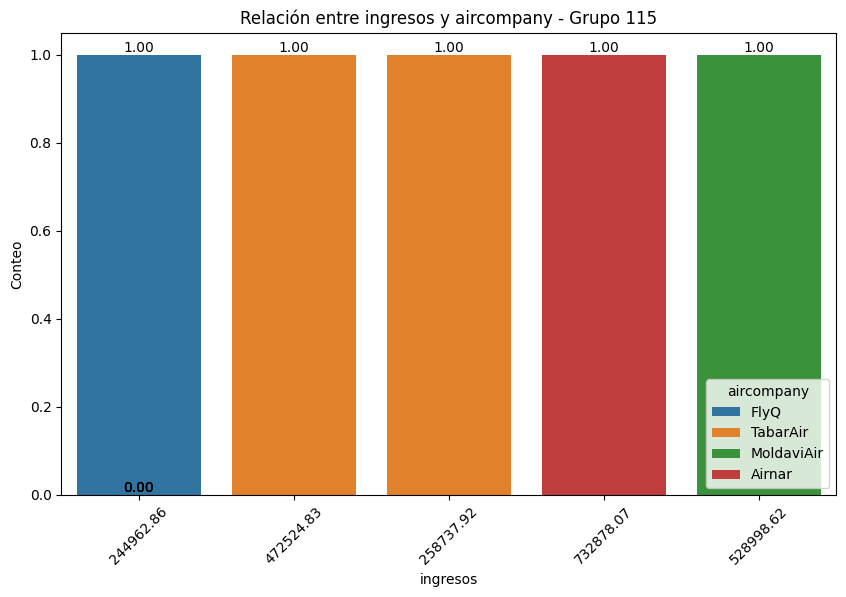

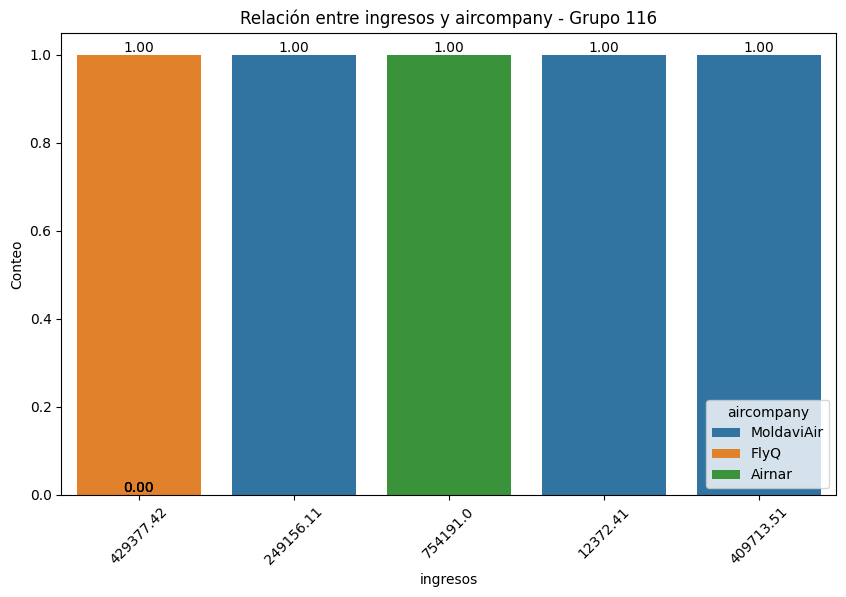

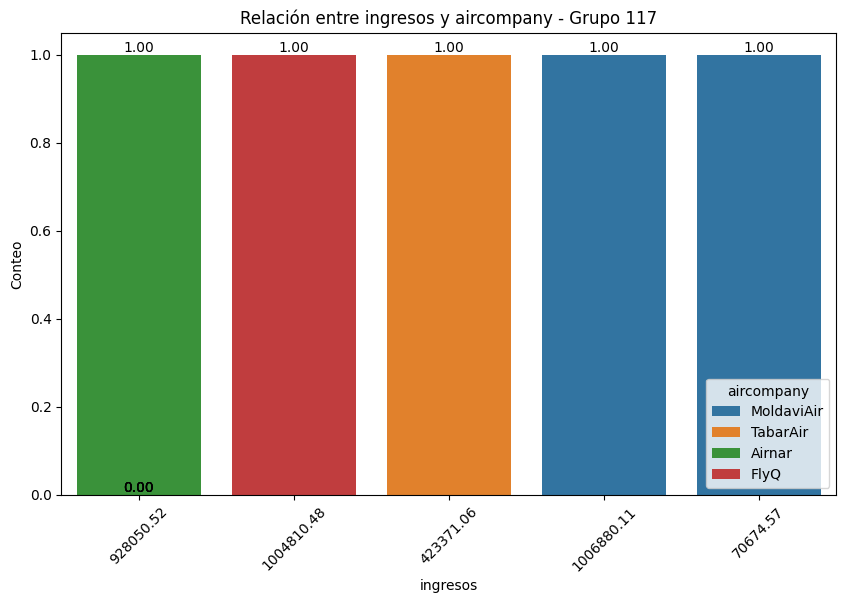

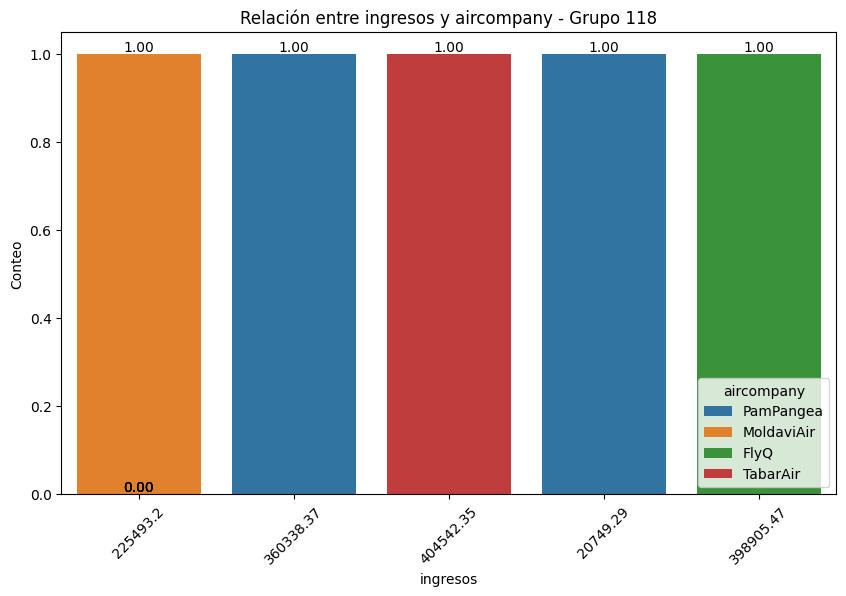

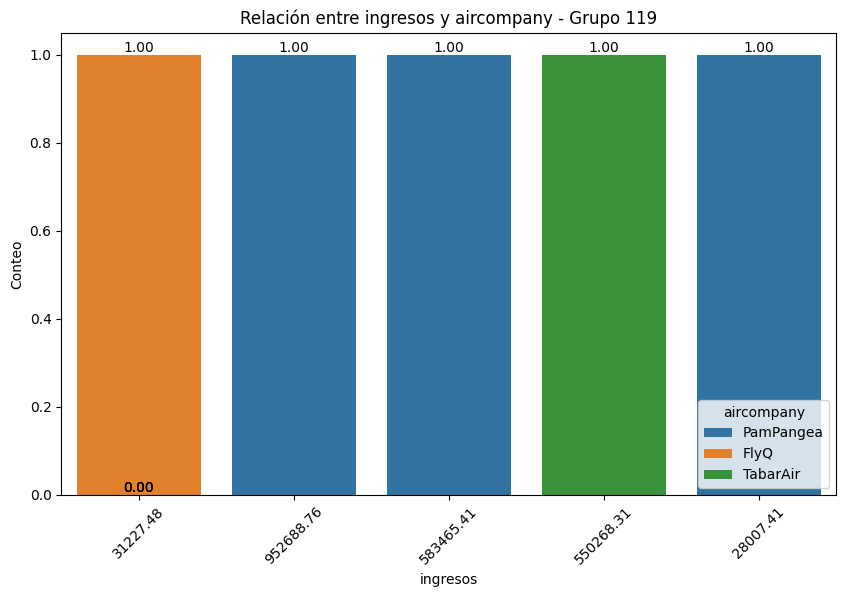

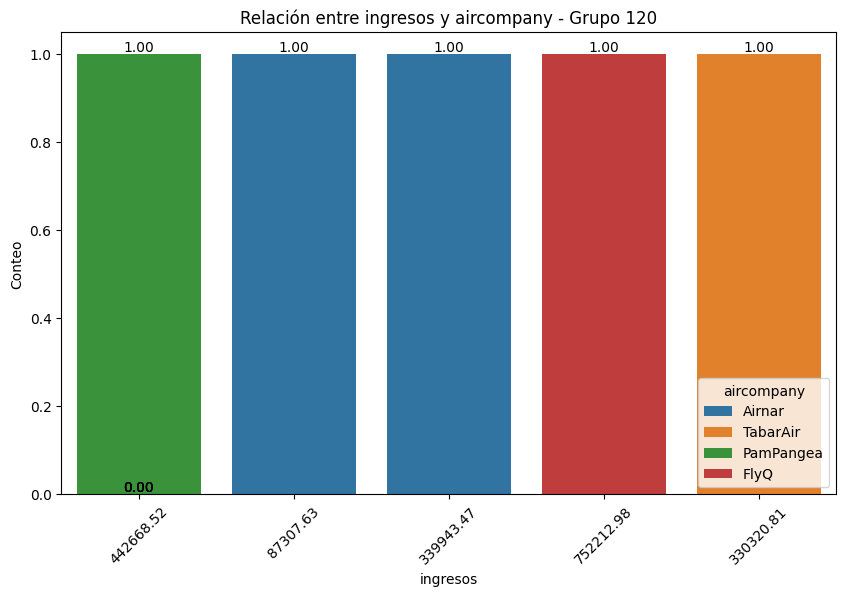

In [ ]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")

print(df_air_jun.columns)

pinta_distribucion_categoricas(df_air_jun,["aircompany","ingresos"], relativa= True, mostrar_valores= True)

plot_categorical_relationship_fin(df_air_jun, "ingresos","aircompany", show_values= True)

# no se yo si esto esta bien

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


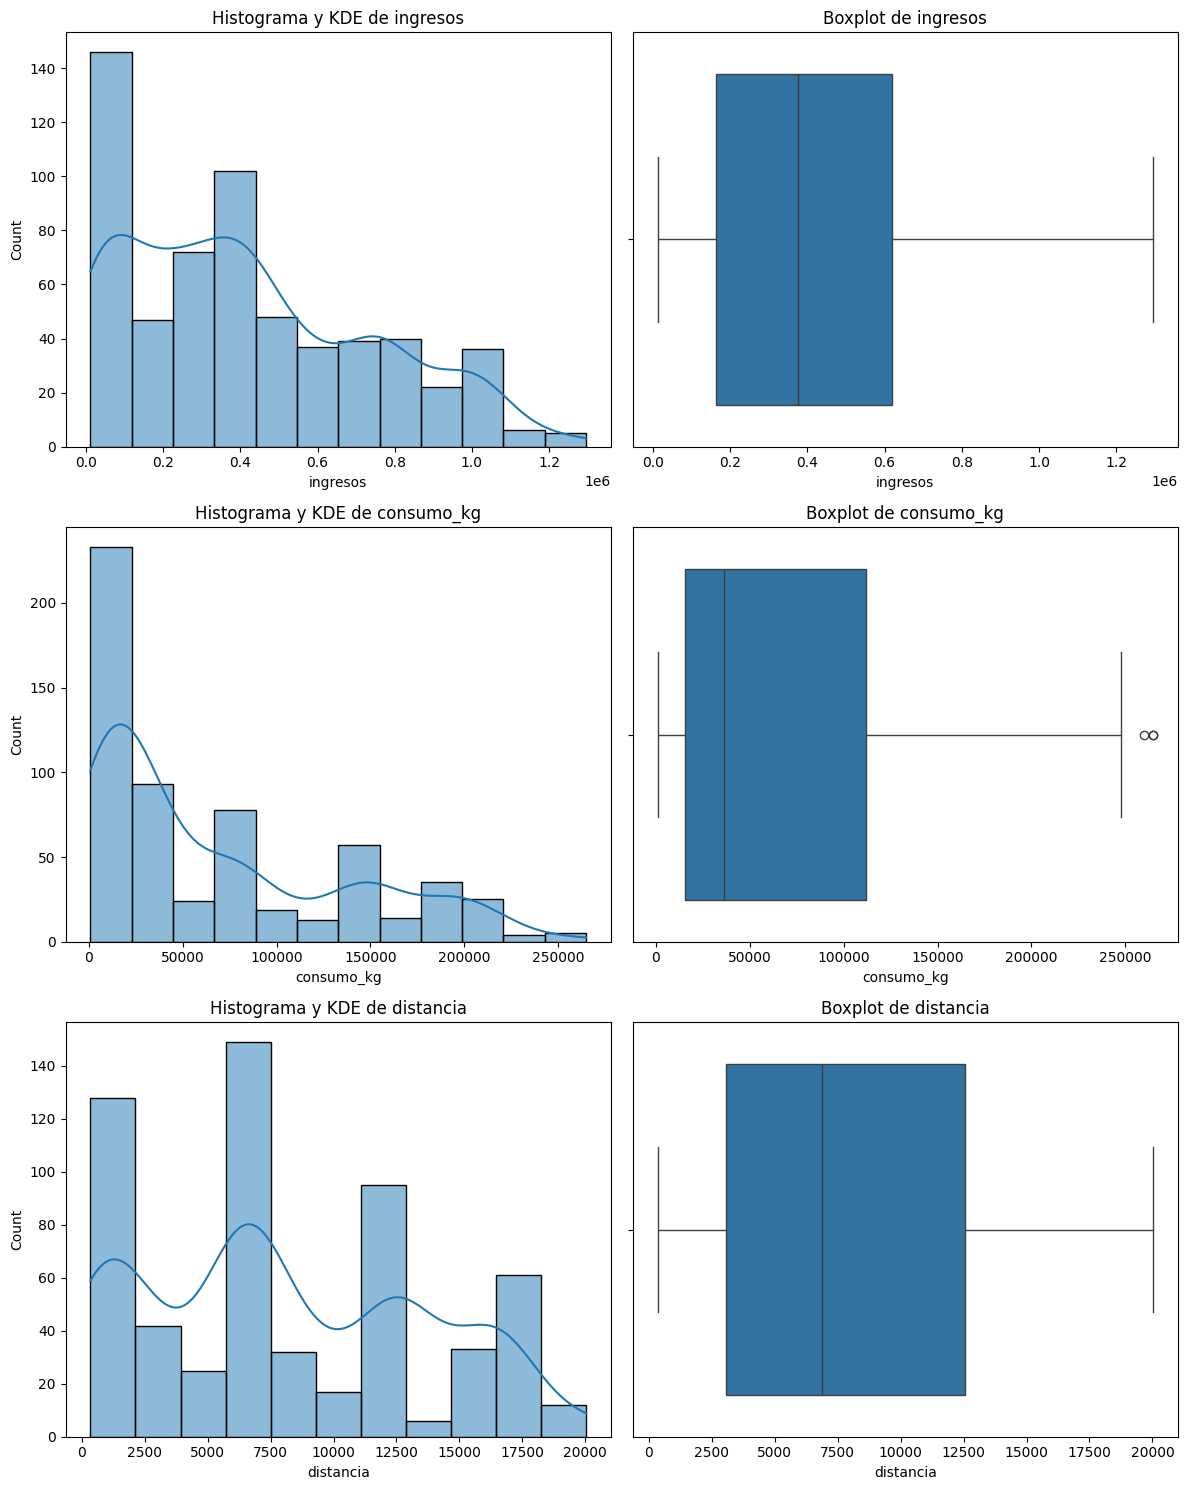

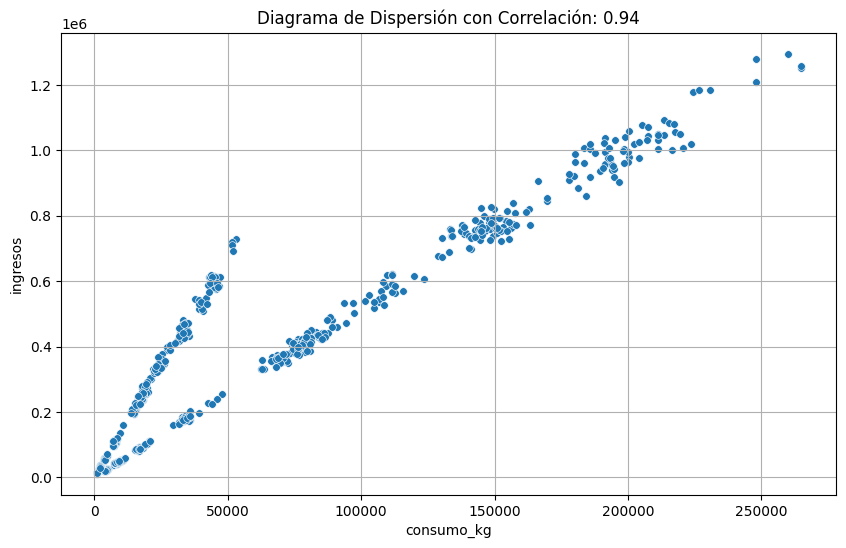

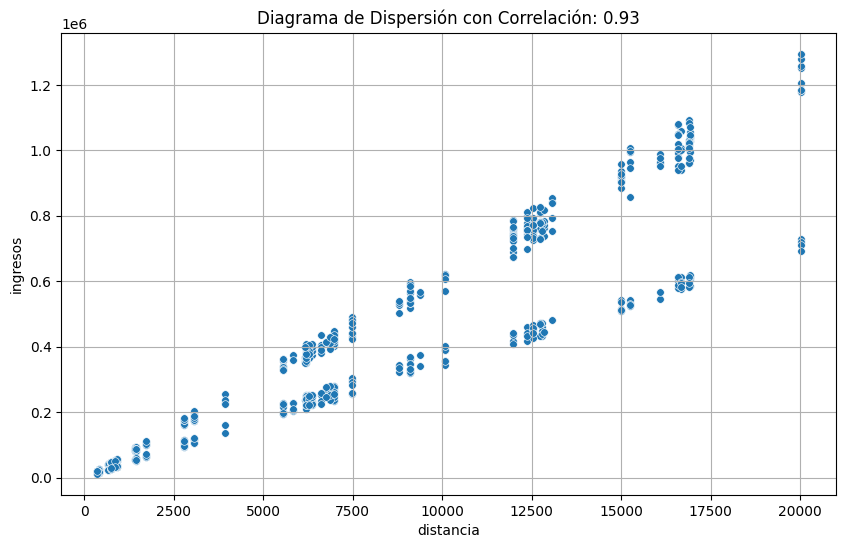

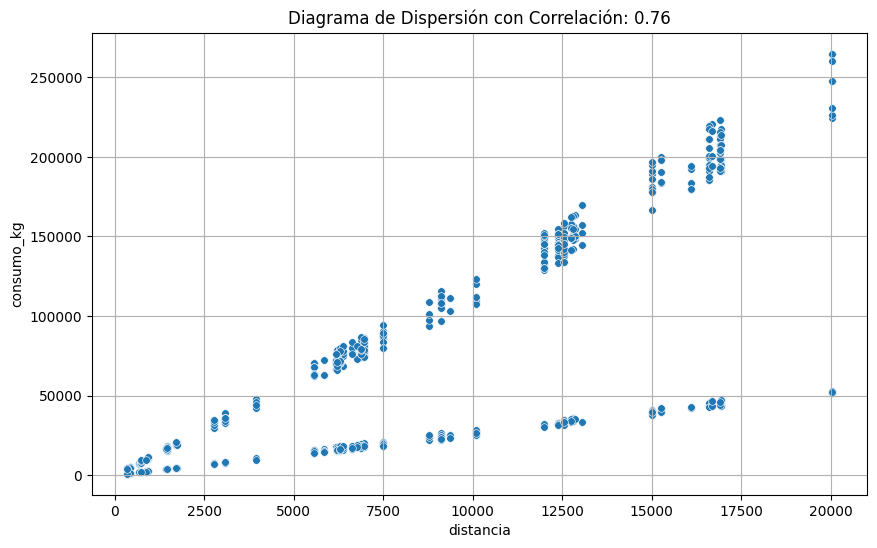

In [57]:
plot_combined_graphs(df_air_jun,["ingresos","consumo_kg","distancia"])
grafico_dispersion_con_correlacion(df_air_jun,"consumo_kg", "ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","ingresos", mostrar_correlacion= True, tamano_puntos= 30)
grafico_dispersion_con_correlacion(df_air_jun,"distancia","consumo_kg", mostrar_correlacion= True, tamano_puntos= 30)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.